In [1]:
import pandas as pd
import os
import re
import numpy as np
from six.moves import xrange
import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy.stats import f_oneway
from scipy.stats import ranksums
from scipy.stats import kstest
from scipy.stats import norm
import random

# Load functions 

In [2]:
def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def abs_cos_vector1(v1, v2):
    return abs(dotproduct(v1, v2) / length(v2))

def calc_force(df):
    df['force'] = df['Fx']**2 + df['Fy']**2 + df['Fz']**2
    df['force'] = df['force'].pow(1/2)
    return df

def calc_velocity(df):
    df['velocity'] = df['Lx']**2 + df['Ly']**2 + df['Lz']
    df['velocity'] = df['velocity'].pow(1/2)
    return df
    
def calc_score(df, factor=2):
    df['score'] = df['front']*df['velocity']/factor
    return df

def time_to_sec(time):
    tmp = time.split(':')
    mins = tmp[0]
    secs = tmp[1]
    return timedelta(minutes=int(mins), seconds=int(secs)).total_seconds()

def find_data(df, uid=None, day=None, exc_num=None, exc_times=None):
    if uid is not None:
        df = df[df['uid']==uid]
        
    if day is not None:
        df = df[df['day']==day]
        
    if exc_num is not None:
        df = df[df['exc_num']==exc_num]
        
    if exc_times is not None:
        df = df[df['exc_times']==exc_times]
        
    return df
#     return df[(df['uid']==uid) & (df['day']==day) & (df['exc_num']==exc_num) & (df['exc_times']==exc_times)]

def del_data(df, uid, day, exc_num, exc_times):
    return df.drop(index= find_data(df, uid, day, exc_num, exc_times).index)
#     return df[(df['uid']!=uid) & (df['day']!=day) & (df['exc_num']!=exc_num) & (df['exc_times']!=exc_times)]

table = pd.DataFrame(np.array([]).reshape(0, 4), columns=['exc', 'type', 'ANOVA', 'U-test'])
selected_exc_pair = [[3, 5], [9, 18], [10, 17]]
selected_exc_pair_last_day = [[9, 18] , [10, 17]]
selected_exc = [element for subset in selected_exc_pair for element in subset]
selected_exc_last_day = [element for subset in selected_exc_pair_last_day for element in subset]
selected_exc_data_score = {}
selected_exc_data_last_day_score = {}
selected_exc_data_time = {}
selected_exc_data_last_day_time = {}
selected_exc_data_all_assess1 = {}
selected_exc_data_all_assess2 = {}
selected_exc_last_day

selected_exc_data = pd.DataFrame() # include score and time data
ks_table = pd.DataFrame(np.array([]).reshape(0,5), 
                        columns=['exc', 'type', 'ks(first)', 'ks(last)', 'ks(last_repetition)'])

# Diagram 1: Performance improvement throughout the training session week 

## Load dataset

In [3]:
# reorder exc_num
# # [day, exc_num]
# tmp_d1 = [[1, i+1] for i in xrange(7)]
# tmp_d2 = [[2,i+1] for i in xrange(8)]
# tmp_d3 = [[3,i+1] for i in xrange(8)]
# tmp_d4 = [[4,i+1] for i in xrange(8)]
# tmp_d5 = [[5,i+1] for i in xrange(11)]
# original_exc_num = tmp_d2 + tmp_d3 + tmp_d4 + tmp_d5
# tmp = [1,0,2,3,4,5,6]
# tmp_d1 = [[1,i] for i in tmp]
# tmp = [2,3,4,6,8,9,10,11]
# tmp_d2 = [[2,i] for i in tmp]
# tmp = [8,9,10,11,12,13,14,15]
# tmp_d3 = [[3,i] for i in tmp]
# tmp = [12,13,14,15,16,17,18,19]
# tmp_d4 = [[4,i] for i in tmp]
# tmp = [12,7,8,9,10,13,14,16,17,18,19]
# tmp_d5 = [[5,i] for i in tmp]
# reordered_exc_num = tmp_d2 + tmp_d3 + tmp_d4 + tmp_d5


# days = ['1_tag/', '2_tag/', '3_tag/', '4_tag/', '5_tag/']
# df = pd.DataFrame()
# for i, day in enumerate(days):
#     data_dir = '../data/old_data/'+day
#     filenames = os.listdir(data_dir)
    
#     for filename in filenames:
#         data_path = data_dir + filename
#         df_tmp = pd.read_csv(data_path)
#         df_tmp = df_tmp.drop(['Force Input', 'Disturbance Force', 'Velocity','Distance'], axis=1)
#         if len(df_tmp)==0:
#             df_tmp = pd.concat([df_tmp, df[0:1]])
#             df_tmp[0:1] = np.nan


#         p = '(^heika)(\d*)(\_)(d)(\d)(\_)(e)(\d*)(\_)(\d)'
#         result = re.match(p, filename)
#         uid = result.groups()[1]
#         d = result.groups()[4]
#         exc_num = result.groups()[7]
#         exc_times = result.groups()[9]
        
#         # replace exc_num
#         d = int(d)
#         exc_num = int(exc_num)
#         exc_times = int(exc_times)
#         if [d, exc_num] in original_exc_num:
#             index = original_exc_num.index([d, exc_num])
#             d, exc_num = reordered_exc_num[index]
            
#         df_tmp['day'] = d
#         df_tmp['exc_num'] = exc_num
#         df_tmp['exc_times'] = exc_times
#         df_tmp['uid'] = uid
        
#         df_tmp['force'] = df_tmp['Fx']**2 + df_tmp['Fy']**2 + df_tmp['Fz']**2
#     #     df_tmp['force'] = (df_tmp['Fx']+df_tmp['Fx.1'])**2 + (df_tmp['Fy']+df_tmp['Fy.1'])**2 + (df_tmp['Fz']+df_tmp['Fz.1'])**2
#         df_tmp['force'] = df_tmp['force'].pow(1/2)
    #     df_tmp['disturbance_force'] = df_tmp['Fx.1']**2 + df_tmp['Fy.1']**2 + df_tmp['Fz.1']**2
    #     df_tmp['disturbance_force'] = df_tmp['disturbance_force'].pow(1/2)



    ############# calc force projection on velocity ###############
    #     force_3d = df_tmp[['Fx', 'Fy', 'Fz']].values
    #     velocity_3d = df_tmp[['Lx', 'Ly', 'Lz']].values
    #     score = []
    #     for i in xrange(len(df_tmp)):
    #         score.append(np.dot(force_3d[i], velocity_3d[i]))
    #     df_tmp['force'] = df_tmp['score']/df_tmp['velocity']


    #############  calc length of vector velocity  ####################
#         df_tmp['velocity'] = df_tmp['Lx']**2 + df_tmp['Ly']**2 + df_tmp['Lz']
#         df_tmp['velocity'] = df_tmp['velocity'].pow(1/2)


    ############# calc score   ###################################
    #     df_tmp['score'] = pd.Series(score)
#         df_tmp['score'] = df_tmp['front']*df_tmp['velocity']


    #############################################################################
#         df_tmp = df_tmp.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
#                       'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)
        
#         df = pd.concat([df, df_tmp])
# df.to_csv('../data/old_data.csv', index=False)
        
# df.to_csv('../data/all_data.csv', index=False)

df = pd.read_csv('../data/old_data.csv')

## Delete outlier 

In [4]:
df = del_data(df, 1, 4, 12, 2)

## Data processing 

In [5]:
df = calc_force(df)
df = calc_velocity(df)
df = calc_score(df)
df = df.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
                      'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)

df_nnp = df.dropna()

In [6]:
# df_6_3 = df[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
# df_6_3_nnp = df_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
# df_6_3 = df_6_3.reset_index()
# df_6_3_nnp = df_6_3_nnp.reset_index()
# # df_6_3 = df_6_3[['day', 'exc_num', 'exc_times', 'score']].groupby(['day', 'exc_num', 'exc_times']).mean()
# # df_6_3_nnp = df_6_3_nnp[['day', 'exc_num', 'exc_times', 'score']].groupby(['day', 'exc_num', 'exc_times']).mean()
# # df_6_3 = df_6_3.reset_index()
# # df_6_3_nnp = df_6_3_nnp.reset_index()

# first_attempt = df_6_3.groupby(['uid', 'exc_num']).head(1)
# first_attempt_nnp = df_6_3_nnp.groupby(['uid', 'exc_num']).head(1)
# first_attempt = first_attempt.reset_index()
# first_attempt_nnp = first_attempt_nnp.reset_index()

# last_attempt = df_6_3.groupby(['uid','exc_num']).tail(1)
# last_attempt_nnp = df_6_3_nnp.groupby(['uid', 'exc_num']).tail(1)
# last_attempt = last_attempt.reset_index()
# last_attempt_nnp = last_attempt_nnp.reset_index()

# last_repetition = df_6_3.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
# last_repetition_nnp = df_6_3_nnp.merge(first_attempt_nnp, on=['uid', 'day', 'exc_num'], how='inner')
# last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
# last_repetition_nnp = last_repetition_nnp.groupby(['uid', 'exc_num']).tail(1)
# last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'score_y'], axis=1)
# last_repetition_nnp = last_repetition_nnp.drop(['index', 'exc_times_x', 'exc_times_y', 'score_y'], axis=1)
# last_repetition.columns = ['day', 'exc_num', 'uid', 'score']
# last_repetition_nnp.columns = ['day', 'exc_num', 'uid', 'score']

# first_attempt = first_attempt[['exc_num', 'score']].groupby(['exc_num']).mean()
# first_attempt = first_attempt.reset_index()
# first_attempt_nnp = first_attempt_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
# first_attempt_nnp = first_attempt_nnp.reset_index()

# last_attempt = last_attempt[['exc_num', 'score']].groupby(['exc_num']).mean()
# last_attempt = last_attempt.reset_index()
# last_attempt_nnp = last_attempt_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
# last_attempt_nnp = last_attempt_nnp.reset_index()

# last_repetition = last_repetition[['exc_num', 'score']].groupby(['exc_num']).mean()
# last_repetition = last_repetition.reset_index()
# last_repetition_nnp = last_repetition_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
# last_repetition_nnp = last_repetition_nnp.reset_index()

# first_attempt['level'] = 'first attempt'
# last_attempt['level'] = 'last attempt on last the training day'
# last_repetition['level'] = 'last repetition in the day of the first attempt'

# first_attempt_nnp['level'] = 'first attempt'
# last_attempt_nnp['level'] = 'last attempt on the last training day'
# last_repetition_nnp['level'] = 'last repetition in the day of the first attempt'

# cols = ['exc_num', 'level', 'score']
# df_6_3 = pd.concat([first_attempt[cols], last_repetition[cols], last_attempt[cols]])
# df_6_3_nnp = pd.concat([first_attempt_nnp[cols], last_repetition_nnp[cols], last_attempt_nnp[cols]])
# df_6_3_nnp.head()

In [18]:
df_6_3 = df[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_3_nnp = df_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_3 = df_6_3.reset_index()
df_6_3_nnp = df_6_3_nnp.reset_index()

first_attempt_nnp = df_6_3_nnp.groupby(['uid', 'exc_num']).head(1)
first_attempt_nnp = first_attempt_nnp.reset_index()

last_attempt_nnp = df_6_3_nnp.groupby(['uid', 'exc_num']).tail(1)
last_attempt_nnp = last_attempt_nnp.reset_index()

last_repetition_nnp = df_6_3_nnp.merge(first_attempt_nnp, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition_nnp = last_repetition_nnp.groupby(['uid', 'exc_num']).tail(1)
last_repetition_nnp = last_repetition_nnp.drop(['index', 'exc_times_x', 'exc_times_y', 'score_y'], axis=1)
last_repetition_nnp.columns = ['day', 'exc_num', 'uid', 'score']

first_attempt_nnp['level'] = 'first attempt'
last_attempt_nnp['level'] = 'last attempt on the last training day'
last_repetition_nnp['level'] = 'last repetition on the day of the first attempt'

cols = ['exc_num', 'level', 'score']
df_6_3_nnp = pd.concat([first_attempt_nnp[cols], last_repetition_nnp[cols], last_attempt_nnp[cols]])
df_6_3_nnp.head()

,exc_num,level,score
0,1,first attempt,21.747808
1,1,first attempt,68.543965
2,1,first attempt,60.927539
3,1,first attempt,99.257496
4,1,first attempt,20.954365


In [41]:
# sns.set_style('whitegrid')
# sns.set(font_scale=2)
# f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.barplot(x="exc_num", y="score", hue='level', data=df_6_3,ci=0)
# ax.set_title('Average score over all participant')
# ax.set(xlabel='exercise index')


## Reset index

In [105]:
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]
df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = df_6_3_nnp[df_6_3_nnp['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,exc_num,level,score
46,1.5|5.1,first attempt,24.645426
47,1.5|5.1,first attempt,19.646378
48,1.5|5.1,first attempt,42.763786
49,1.5|5.1,first attempt,18.883096
50,1.5|5.1,first attempt,36.812447
51,1.5|5.1,first attempt,43.217241
52,1.5|5.1,first attempt,22.786913
53,1.5|5.1,first attempt,28.336407
54,1.5|5.1,first attempt,21.489916
55,1.5|5.1,first attempt,28.106126


## Draw diagram

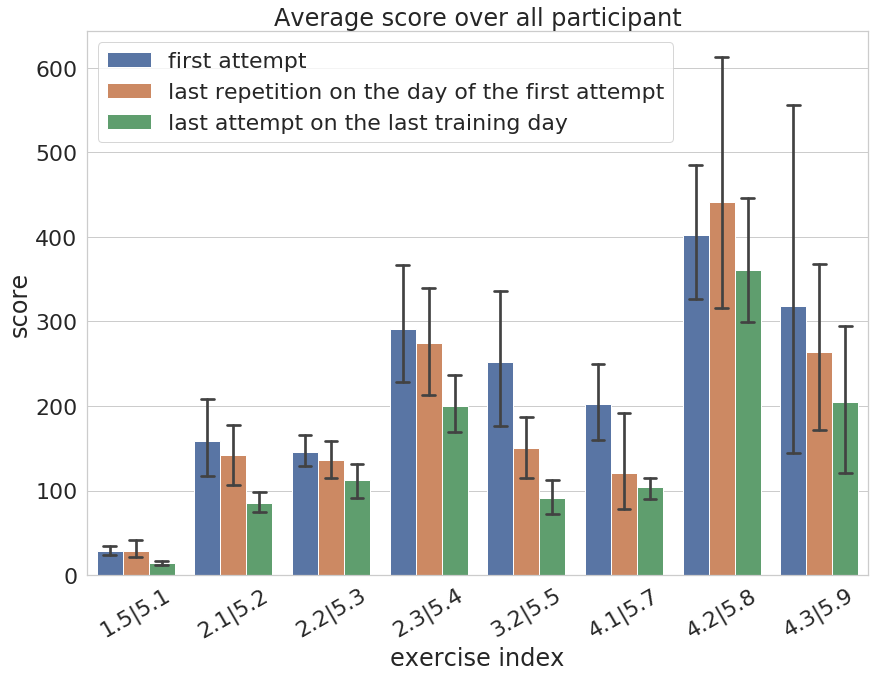

In [106]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', capsize=.13, data=df_tmp)
ax.set_title('Average score over all participant')
ax.set(xlabel='exercise index')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_3_reorder_average_score_over_all_participator_with_title.png", bbox_inches='tight')


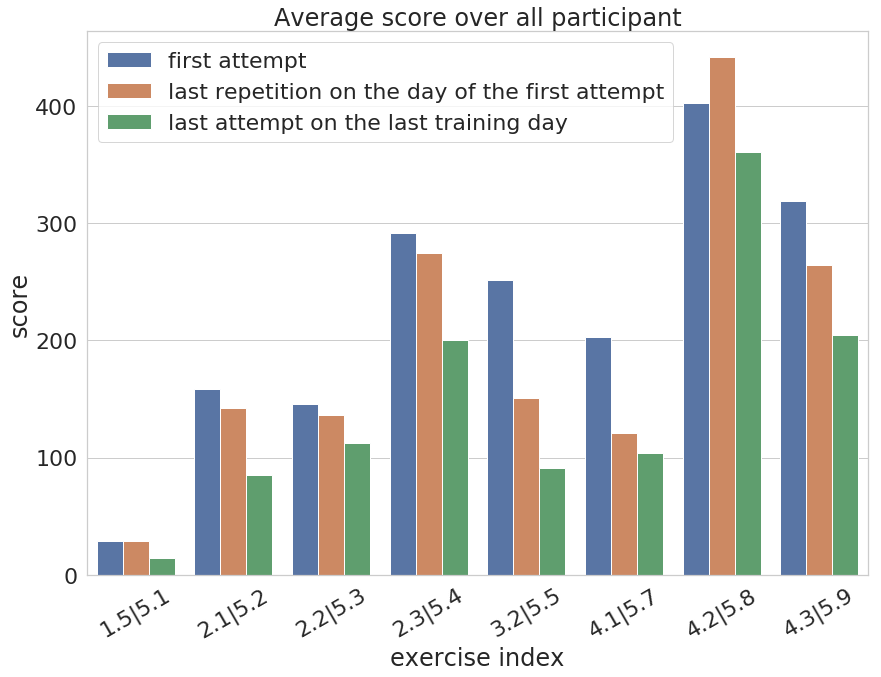

In [107]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', ci=None, data=df_tmp)
ax.set_title('Average score over all participant')
ax.set(xlabel='exercise index')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_3_reorder_average_score_over_all_participator_with_title.png", bbox_inches='tight')


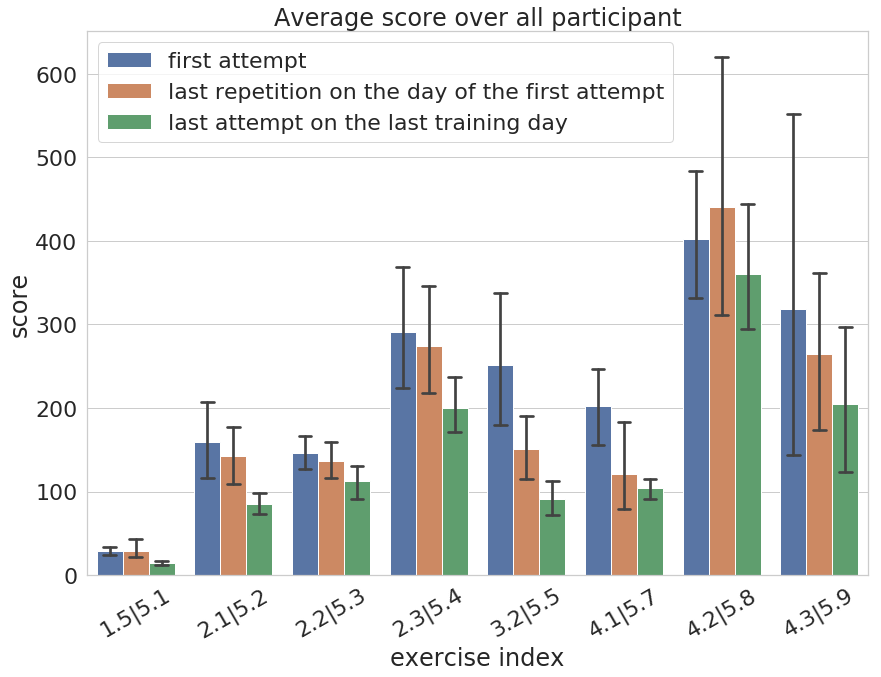

In [108]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', capsize=.13, data=df_tmp)
ax.set_title('Average score over all participant')
ax.set(xlabel='exercise index')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_3_reorder_average_score_over_all_participator_with_title_stddev.png", bbox_inches='tight')


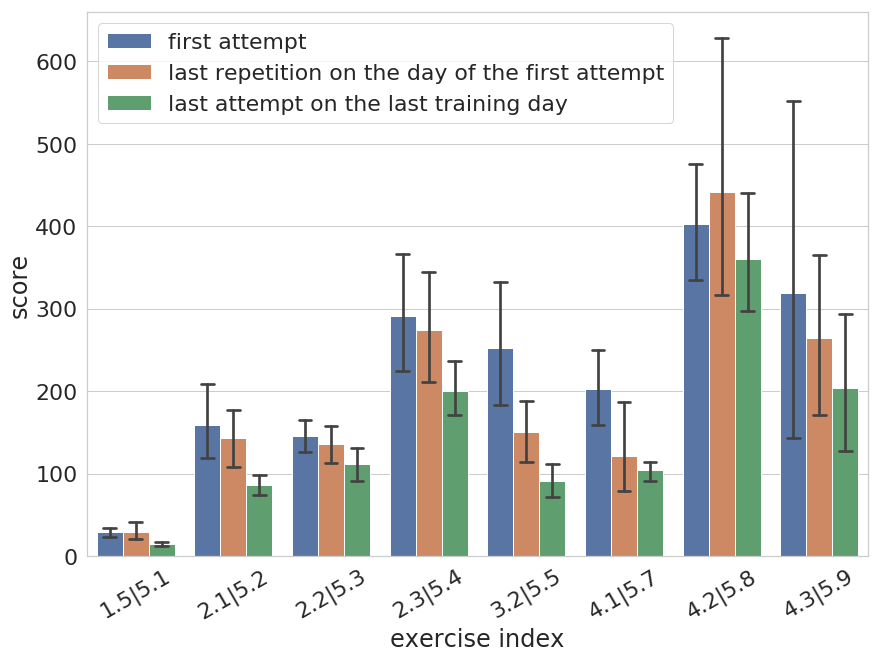

In [109]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', capsize=.13, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_3_reorder_average_score_over_all_participator_without_title_stddev.png", bbox_inches='tight')

In [110]:
# sns.set_style('whitegrid')

# f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.barplot(x="exc_num", y="score", hue='level', data=df_tmp)
# ax.set(xlabel='exercise index')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# plt.gca().legend().set_title('')
# plt.savefig("../data/figure/fig_6_3_reorder_average_score_over_all_participator_without_title_stddev.png", bbox_inches='tight')

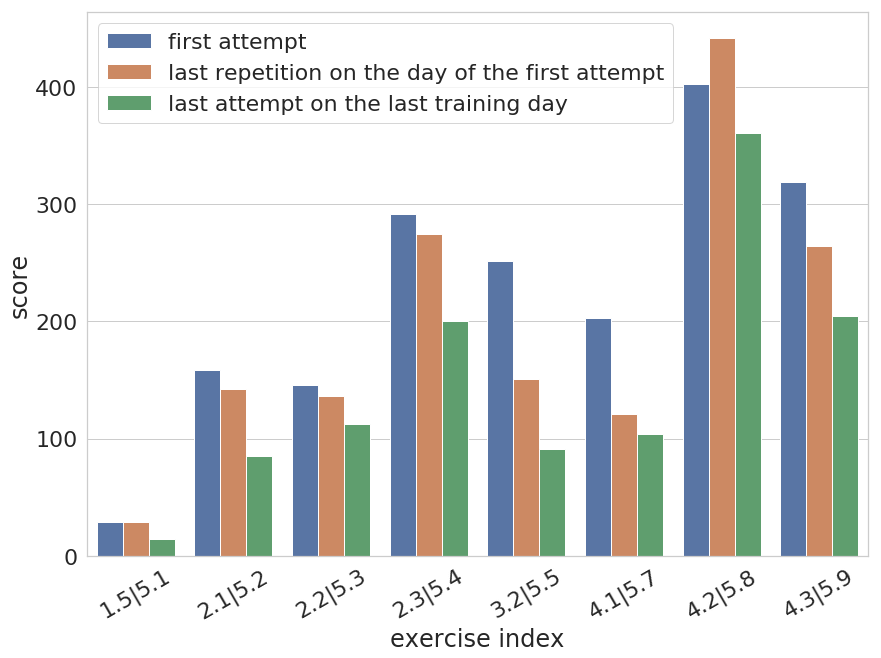

In [111]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', ci=None, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_3_reorder_average_score_over_all_participator_without_title.png", bbox_inches='tight')

## Diagram 1.2: ANOVA, Mann-Whitney U Test (Wilcoxon Rank Sum)

In [19]:
table_last = pd.DataFrame(np.array([]).reshape(0, 4), columns=['exc', 'type', 'ANOVA', 'U-test'])
table_last_repetition = pd.DataFrame(np.array([]).reshape(0, 4), columns=['exc', 'type', 'ANOVA', 'U-test'])
anova_tmp = pd.concat([first_attempt_nnp.set_index(['uid', 'exc_num'])['score'],
                   last_attempt_nnp.set_index(['uid', 'exc_num'])['score'],
                       last_repetition_nnp.set_index(['uid', 'exc_num'])['score']],    
                   join='inner', axis=1)
anova_tmp.columns = ['first_score', 'last_score', 'last_repetition']
anova_tmp = anova_tmp.reset_index()
# print(anova_tmp)
groups = anova_tmp.groupby(['exc_num'])
anova = pd.DataFrame(np.array([]).reshape(0, 2), columns=['exc_num', 'a_p_value'])
anova_last_repetition = pd.DataFrame(np.array([]).reshape(0, 2), columns=['exc_num', 'a_p_value'])
u = pd.DataFrame(np.array([]).reshape(0, 2), columns=['exc_num', 'u_p_value'])
u_last_repetition = pd.DataFrame(np.array([]).reshape(0, 2), columns=['exc_num', 'u_p_value'])

for index, group in groups:
#     print(group)
    # U test
    uids = group['uid'].unique()
    if len(uids)<8:
        continue
    index_a = [1,2,3,4,5]
    index_b = list(set(uids).difference(index_a))
    
    a = group.set_index(['uid']).loc[index_a, 'first_score']
    b = group.set_index(['uid']).loc[index_b, 'last_score']
    c = group.set_index(['uid']).loc[index_b, 'last_repetition']

    
    _, u_p_value = ranksums(a,b)
    tmp2 = pd.DataFrame(np.array([index, u_p_value]).reshape(1, 2), columns=['exc_num', 'u_p_value'])
    u = u.append(tmp2)
    _, u_p_value = ranksums(a,c)
    tmp2 = pd.DataFrame(np.array([index, u_p_value]).reshape(1, 2), columns=['exc_num', 'u_p_value'])
    u_last_repetition = u_last_repetition.append(tmp2)
    
    
    # ANOVA
    F_value, a_p_value = f_oneway(group['first_score'], group['last_score'])
    tmp = pd.DataFrame(np.array([index, a_p_value]).reshape(1, 2), columns=['exc_num', 'a_p_value'])
    anova = anova.append(tmp)
    F_value, a_p_value = f_oneway(group['first_score'], group['last_repetition'])
    tmp = pd.DataFrame(np.array([index, a_p_value]).reshape(1, 2), columns=['exc_num', 'a_p_value'])
    anova_last_repetition = anova_last_repetition.append(tmp)

    # selected exercises
    if index in selected_exc:
        curr = group[['exc_num', 'first_score', 'last_score', 'last_repetition']]
        curr['type'] = 'score'
        curr.columns = ['exc', 'first', 'last', 'last_repetition', 'type']
        selected_exc_data = pd.concat([selected_exc_data, curr])
        
    # KS Test with normal distribution
    meana = np.mean(group['first_score'])
    stda = np.std(group['first_score'])
    meanb = np.mean(group['last_score'])
    stdb = np.std(group['last_score'])
    meanc = np.mean(group['last_repetition'])
    stdc = np.std(group['last_repetition'])
    
    _, pa = kstest(group['first_score'], 'norm', args=(meana, stda))
    _, pb = kstest(group['last_score'], 'norm', args=(meanb, stdb))
    _, pc = kstest(group['last_repetition'], 'norm', args=(meanc, stdc))
    
    curr = pd.DataFrame(np.array([index, 'score', pa, pb, pc]).reshape(1,5), 
                        columns=['exc', 'type', 'ks(first)', 'ks(last)', 'ks(last_repetition)'])
    ks_table = ks_table.append(curr)
       
    
# rename selected exc data's columns
anova = anova.reset_index(drop=True)
anova_last_repetition = anova_last_repetition.reset_index(drop=True)
u = u.reset_index(drop=True)
u_last_repetition = u_last_repetition.reset_index(drop=True)
# print(anova)
# anova_last_repetition
# print(u)
# u_last_repetition

tmp = anova
tmp['exc'] = tmp['exc_num']
tmp['ANOVA'] = tmp['a_p_value']
tmp['U-test'] = u['u_p_value']
tmp['type'] = 'score'
tmp = tmp[['exc', 'type', 'ANOVA', 'U-test']]
table_last = pd.concat([table_last, tmp])

tmp = anova_last_repetition
tmp['exc'] = tmp['exc_num']
tmp['ANOVA'] = tmp['a_p_value']
tmp['U-test'] = u_last_repetition['u_p_value']
tmp['type'] = 'score'
tmp = tmp[['exc', 'type', 'ANOVA', 'U-test']]
table_last_repetition = pd.concat([table_last_repetition, tmp])
table_last_repetition

,exc,type,ANOVA,U-test
0,3.0,score,0.649554,0.916815
1,4.0,score,0.534031,0.754023
2,5.0,score,0.468116,0.464702
3,6.0,score,0.996238,0.754023
4,7.0,score,0.956297,0.916815
5,8.0,score,0.599447,0.916815
6,9.0,score,0.542012,0.754023
7,10.0,score,0.750012,0.117185
8,12.0,score,0.357700,0.754023
9,13.0,score,0.044551,0.028280


In [58]:
anova_tmp

,uid,exc_num,first_score,last_score
0,1,1,21.747808,9.963524
1,1,3,6.354035,6.829834
2,1,4,43.530778,294.603644
3,1,5,99.109765,94.094396
4,1,6,65.427203,20.604228
5,1,7,24.645426,8.792348
6,1,8,137.093255,64.131976
7,1,9,167.789190,153.368668
8,1,10,193.610262,167.791641
9,1,12,93.770237,60.311780


### Reset index

In [188]:
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]
df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = anova[anova['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,exc_num,a_p_value,exc,ANOVA,U-test,type
4,1.5|5.1,0.000309,7.0,0.000309,0.028280,score
5,2.1|5.2,0.009767,8.0,0.009767,0.075800,score
6,2.2|5.3,0.036152,9.0,0.036152,0.250592,score
7,2.3|5.4,0.044224,10.0,0.044224,0.028280,score
9,3.2|5.5,0.001613,13.0,0.001613,0.009023,score
10,4.1|5.7,0.000948,16.0,0.000948,0.009023,score
11,4.2|5.8,0.467172,17.0,0.467172,0.174525,score
12,4.3|5.9,0.379920,18.0,0.379920,0.754023,score


### Draw diagram (ANOVA)

No handles with labels found to put in legend.


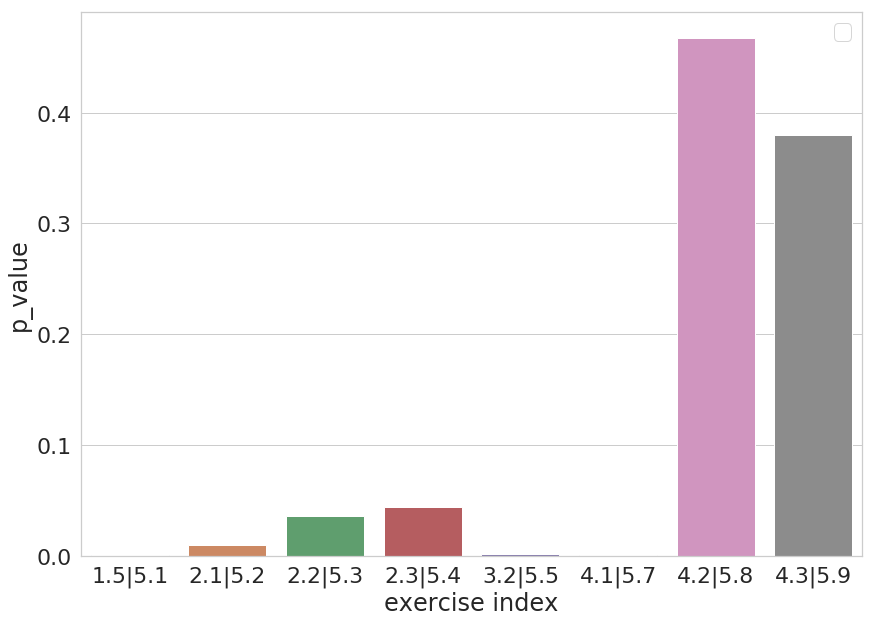

In [189]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="a_p_value", ci=None, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set(ylabel='p_value')
# ax.set_xticklabels(ax.get_xticklabels())

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_anova_score_without_title.png", bbox_inches='tight')

No handles with labels found to put in legend.


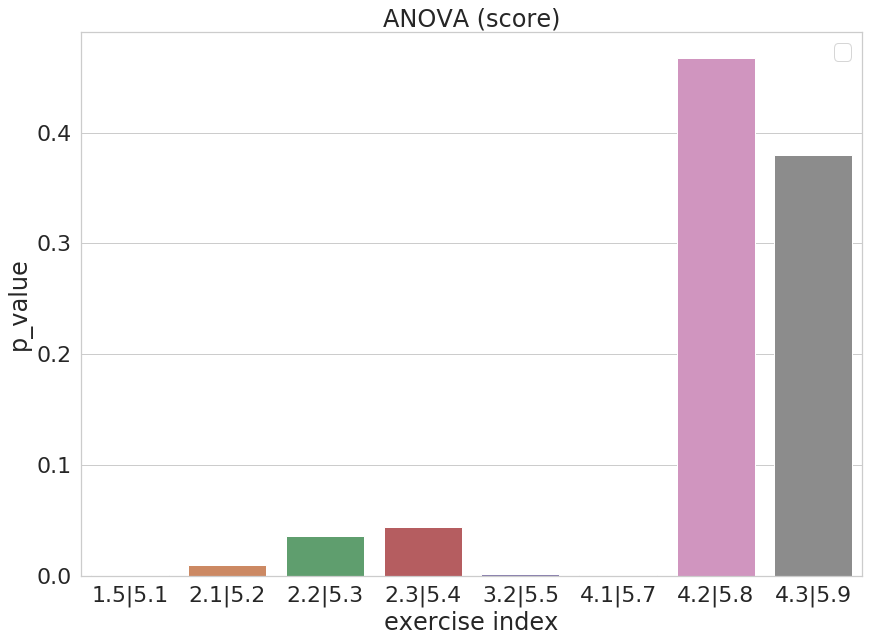

In [190]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="a_p_value", ci=None, data=df_tmp)
ax.set_title('ANOVA (score)')
ax.set(xlabel='exercise index')
ax.set(ylabel='p_value')
# ax.set_xticklabels(ax.get_xticklabels())

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_anova_score_with_title.png", bbox_inches='tight')

### Reset index

In [191]:
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]
df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = u[u['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,exc_num,u_p_value
4,1.5|5.1,0.028280
5,2.1|5.2,0.075800
6,2.2|5.3,0.250592
7,2.3|5.4,0.028280
9,3.2|5.5,0.009023
10,4.1|5.7,0.009023
11,4.2|5.8,0.174525
12,4.3|5.9,0.754023


### Draw diagram (U Test)

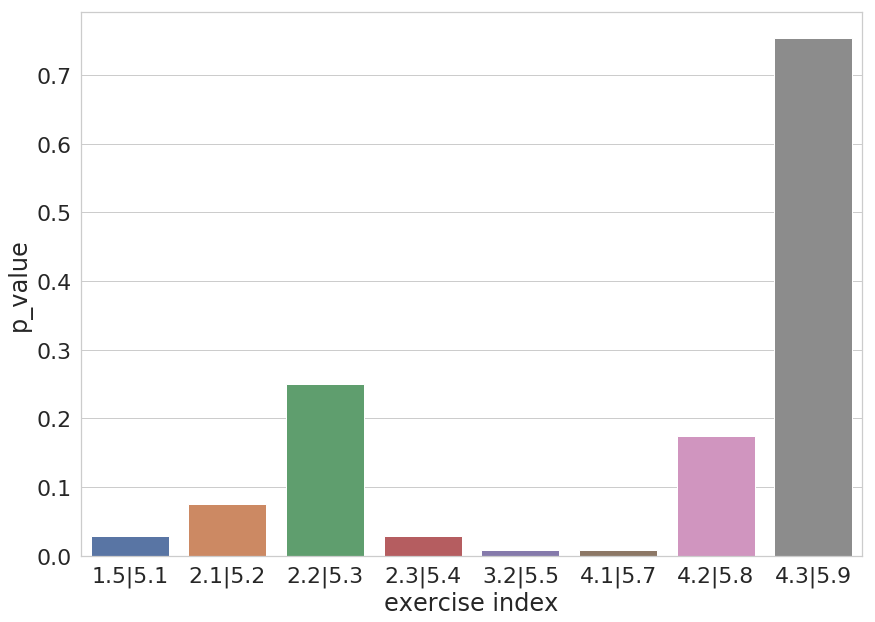

In [192]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="u_p_value", ci=None, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set(ylabel='p_value')

plt.savefig("../data/figure/fig_U_score_without_title.png", bbox_inches='tight')

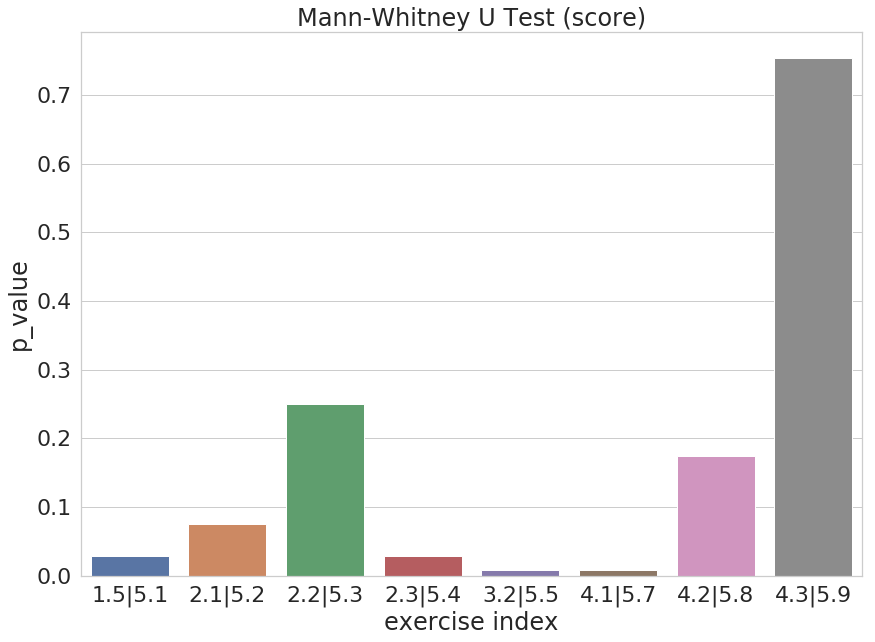

In [193]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="u_p_value", ci=None, data=df_tmp)
ax.set_title('Mann-Whitney U Test (score)')
ax.set(ylabel='p_value')
ax.set(xlabel='exercise index')

plt.savefig("../data/figure/fig_U_score_with_title.png", bbox_inches='tight')

## Table 1.3: ANOVA(average value) for selected exercises 

In [216]:
sa = df_nnp
score = sa[['day', 'exc_num', 'uid', 'exc_times', 'score']]. \
    groupby(['day', 'exc_num', 'uid', 'exc_times']).sum().reset_index()
ave_score = score[['day', 'exc_num', 'uid', 'score']].groupby(['day', 'exc_num', 'uid']).mean()
groups = ave_score.reset_index().groupby(['day', 'exc_num'])

for index, group in groups:
    day, exc = index
    if day == 5:
        if exc in selected_exc_last_day:
            selected_exc_data_last_day_score[exc] = group['score'].tolist()
    else:
        if exc in selected_exc:
            selected_exc_data_score[exc] = group['score'].tolist()


# Diagram 2: Whisker box for diagram 1

## Data processing

In [56]:
df_6_4 = df[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_4_nnp = df_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_4 = df_6_4.reset_index()
df_6_4_nnp = df_6_4_nnp.reset_index()

first_attempt = df_6_4.groupby(['exc_num', 'uid']).head(1)
first_attempt_nnp = df_6_4_nnp.groupby(['exc_num', 'uid']).head(1)
first_attempt = first_attempt.reset_index()
first_attempt_nnp = first_attempt_nnp.reset_index()

last_attempt = df_6_4.groupby(['exc_num', 'uid']).tail(1)
last_attempt_nnp = df_6_4_nnp.groupby(['exc_num', 'uid']).tail(1)
last_attempt = last_attempt.reset_index()
last_attempt_nnp = last_attempt_nnp.reset_index()

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt on the last training day'

first_attempt_nnp['level'] = 'first attempt'
last_attempt_nnp['level'] = 'last attempt on the last training day'

cols = ['uid', 'day', 'exc_num', 'level', 'score']
df_6_4 = pd.concat([first_attempt[cols], last_attempt[cols]])
df_6_4_nnp = pd.concat([first_attempt_nnp[cols], last_attempt_nnp[cols]])

## Reset index 

In [57]:
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]

df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = df_6_4_nnp[df_6_4_nnp['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,uid,day,exc_num,level,score
46,1,1,1.5|5.1,first attempt,24.645426
47,2,1,1.5|5.1,first attempt,19.646378
48,3,1,1.5|5.1,first attempt,42.763786
49,4,1,1.5|5.1,first attempt,18.883096
50,5,1,1.5|5.1,first attempt,36.812447
51,6,1,1.5|5.1,first attempt,43.217241
52,7,1,1.5|5.1,first attempt,22.786913
53,8,1,1.5|5.1,first attempt,28.336407
54,10,1,1.5|5.1,first attempt,21.489916
55,11,1,1.5|5.1,first attempt,28.106126


## draw diagram 

In [18]:
# sns.set_style('whitegrid')
# f, ax= plt.subplots(figsize = (14, 10))
# plt.gca().legend().set_title('')
# ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_6_4).set_title('whisker box with outlier')

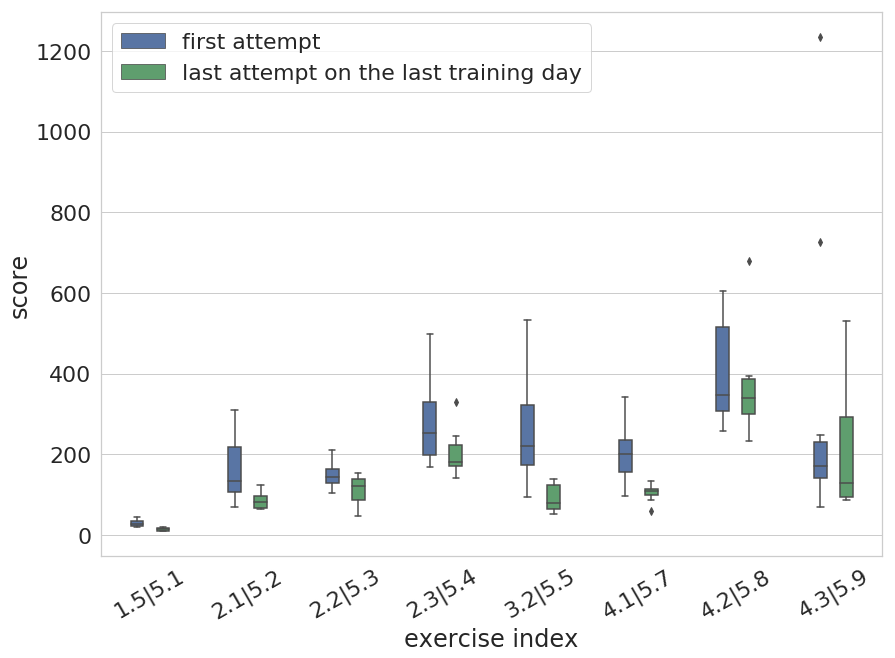

In [19]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_4_whisker_box_score_without_title.png", bbox_inches='tight')

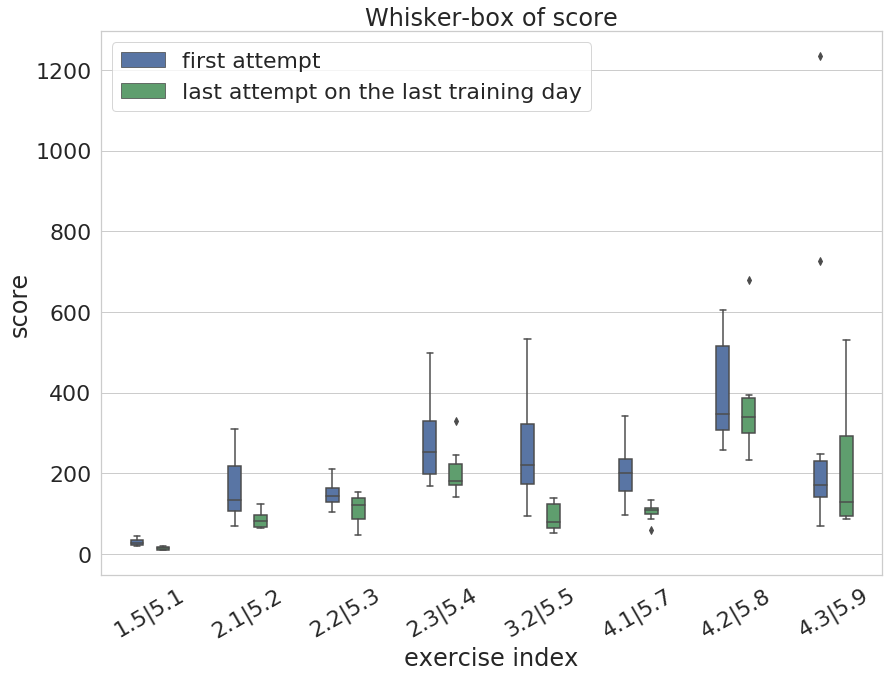

In [20]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set_title('Whisker-box of score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_4_whisker_box_score_with_title.png", bbox_inches='tight')

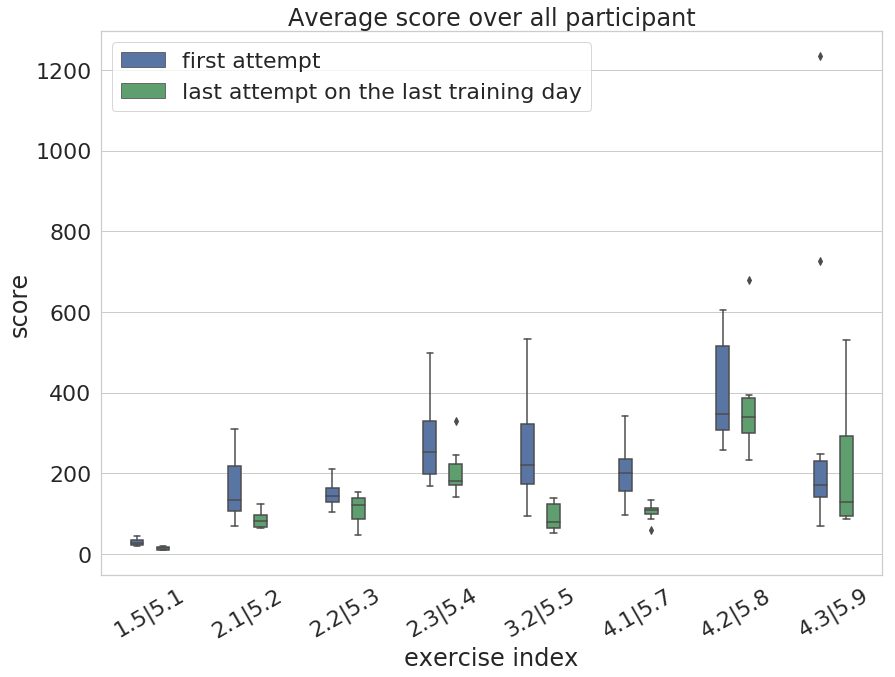

In [21]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set_title('Average score over all participant')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_4_whisker_box_score_with_same_title.png", bbox_inches='tight')

# Diagram 3 Timing Measurements

## Load dataset

In [6]:
# dir = '../data/'
# filenames = ['tag 1', 'tag 2', 'tag 3', 'tag 4', 'tag 5']
# # init 
# exc_content = {}
# is_part = False
# b_get_csv = False
# df = pd.DataFrame([], columns=['uid', 'day', 'exc_num', 'exc_times', 'running_time'])

# for filename in filenames:
#     filename = dir+filename
#     with open(filename, 'r') as f:
#         for line in f:
#             b_get_csv = False
#             if line.startswith('tag'):
#                 p_day = '(^tag )(\d+)'
#                 result = re.match(p_day, line)
#                 day = result.groups()[1]
#                 week = None
#                 uid = None
#                 start_time = None
                
#             elif line.startswith('HEiKA'):
#                 p_uid = '(^HEiKA)(\d*)'
#                 result = re.match(p_uid, line)
#                 uid = result.groups()[1]
#             elif line.startswith('start_time'):
#                 p_start_time = '(^start_time: )(.*)'
#                 result = re.match(p_start_time, line)
#                 start_time = result.groups()[1]
  
#             elif line.startswith('e'):
#                 p_exc = '(^e)(\d*)(.)(.*)'
#                 result = re.match(p_exc, line)
#                 char = result.groups()[2]
#                 num = result.groups()[1]
#                 if char == ':':
#                     content = result.groups()[3][1:]
#                     exc_content[num] = content

#                 elif char == ' ':
#                     b_get_csv = True
#                     exc_num = num
#                     infos = result.groups()[3].split(' ')
#                     if infos[1].startswith('part'):
#                         is_part = True
#                         exc_times = infos[0][1:]
#                         part_num = infos[1][-2]
#                         s_time = time_to_sec(infos[2])
#                         e_time = time_to_sec(infos[4])

#                     else:
#                         is_part = False
#                         exc_times = infos[0][1:-1]
#                         s_time = time_to_sec(infos[1])
#                         e_time = time_to_sec(infos[3])
                        
#             if b_get_csv:
#                 row = [uid, day, exc_num, exc_times, e_time-s_time]
#                 df_tmp = pd.DataFrame(np.array(row).reshape(1,-1),columns=['uid', 'day', 'exc_num', 'exc_times', 'running_time'])
#                 df = pd.concat([df, df_tmp], axis=0)
                
# df.to_csv('../data/running_time.csv', index=False)
df = pd.read_csv('../data/running_time.csv')


## Data processing

In [21]:
# df_6_5 = df.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
# df_6_5 = df_6_5.reset_index()

# first_attempt = df_6_5.groupby(['uid', 'exc_num']).head(1)
# first_attempt = first_attempt.reset_index()

# last_attempt = df_6_5.groupby(['uid','exc_num']).tail(1)
# last_attempt = last_attempt.reset_index()


# last_repetition = df_6_5.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
# last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
# last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'running_time_y'], axis=1)
# last_repetition.columns = ['uid', 'day', 'exc_num', 'running_time']

# first_attempt = first_attempt[['exc_num', 'running_time']].groupby(['exc_num']).mean()
# first_attempt = first_attempt.reset_index()

# last_attempt = last_attempt[['exc_num', 'running_time']].groupby(['exc_num']).mean()
# last_attempt = last_attempt.reset_index()

# last_repetition = last_repetition[['exc_num', 'running_time']].groupby(['exc_num']).mean()
# last_repetition = last_repetition.reset_index()

# first_attempt['level'] = 'first attempt'
# last_attempt['level'] = 'last attempt on the last training day'
# last_repetition['level'] = 'last repetition in the day of the first attempt'

# cols = ['exc_num', 'level', 'running_time']
# df_6_5 = pd.concat([first_attempt[cols], last_repetition[cols], last_attempt[cols]])
# df_6_5

In [7]:
df_6_5 = df.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_6_5 = df_6_5.reset_index()

first_attempt = df_6_5.groupby(['uid', 'exc_num']).head(1)
first_attempt = first_attempt.reset_index()

last_attempt = df_6_5.groupby(['uid','exc_num']).tail(1)
last_attempt = last_attempt.reset_index()


last_repetition = df_6_5.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'running_time_y'], axis=1)
last_repetition.columns = ['uid', 'day', 'exc_num', 'running_time']


first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt on the last training day'
last_repetition['level'] = 'last repetition on the day of the first attempt'

cols = ['exc_num', 'level', 'running_time']
df_6_5 = pd.concat([first_attempt[cols], last_repetition[cols], last_attempt[cols]])
df_6_5

,exc_num,level,running_time
0,1,first attempt,108.0
1,2,first attempt,59.0
2,3,first attempt,83.0
3,4,first attempt,139.0
4,5,first attempt,111.0
5,6,first attempt,64.0
6,8,first attempt,94.0
7,9,first attempt,111.0
8,10,first attempt,122.0
9,11,first attempt,552.0


## Reset index

In [8]:
# selector = [[12, "3.1|5.1"], [7, "1.8|5.2"],[8,"2.1|5.3"], [9, "2.2|5.4"], [10, "2.3|5.5"], [13, "3.2|5.6"], [14, "3.3|5.7"], [16, "4.1|5.8"], [17,"4.2|5.9"], [18, "4.3|5.10"]]
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [14, "3.3|5.6"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]

df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = df_6_5[df_6_5['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,exc_num,level,running_time
18,1.5|5.1,first attempt,39.0
37,1.5|5.1,first attempt,35.0
56,1.5|5.1,first attempt,52.0
74,1.5|5.1,first attempt,57.0
94,1.5|5.1,first attempt,38.0
113,1.5|5.1,first attempt,47.0
131,1.5|5.1,first attempt,73.0
150,1.5|5.1,first attempt,34.0
169,1.5|5.1,first attempt,47.0
187,1.5|5.1,first attempt,38.0


## Draw diagram

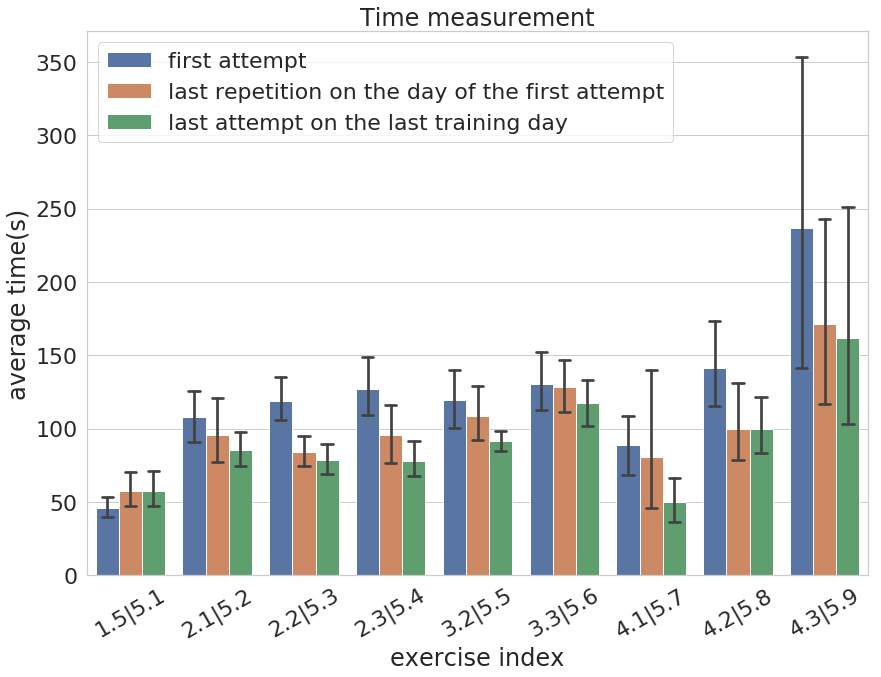

In [115]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="running_time", hue='level', capsize=.13, data=df_tmp)

ax.set_title('Time measurement')
ax.set(xlabel='exercise index', ylabel='average time(s)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_3_average_time_over_all_participator_with_title_stddev.png", bbox_inches='tight')

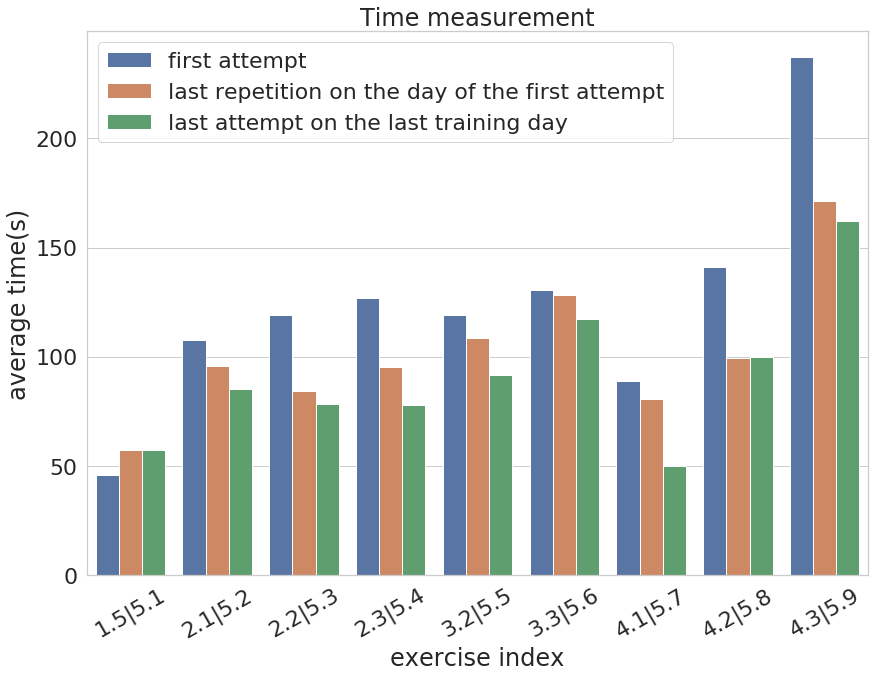

In [116]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="running_time", hue='level', ci=None, data=df_tmp)

ax.set_title('Time measurement')
ax.set(xlabel='exercise index', ylabel='average time(s)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_3_average_time_over_all_participator_with_title.png", bbox_inches='tight')

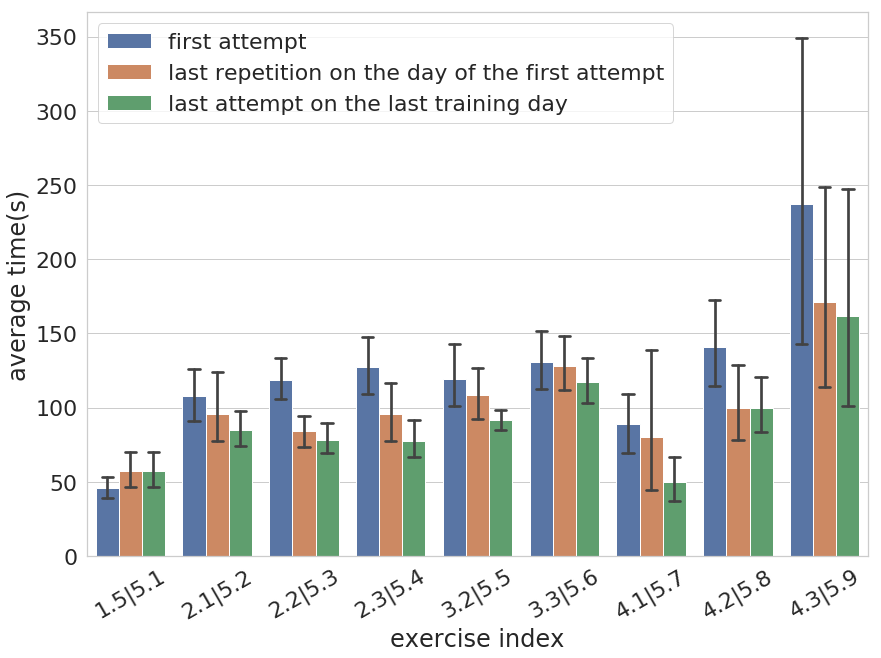

In [117]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="running_time", hue='level', capsize=.13, data=df_tmp)
ax.set(xlabel='exercise index', ylabel='average time(s)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_3_average_time_over_all_participator_without_title_stddev.png", bbox_inches='tight')

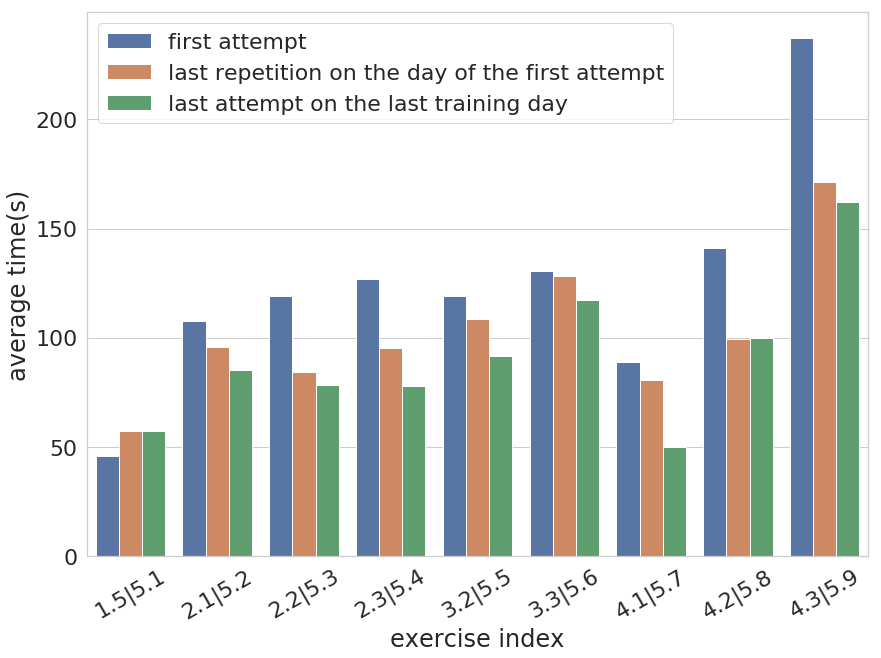

In [118]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="running_time", hue='level', ci=None, data=df_tmp)
ax.set(xlabel='exercise index', ylabel='average time(s)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_3_average_time_over_all_participator_without_title.png", bbox_inches='tight')

In [119]:
# sns.set_style('whitegrid')
# f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.barplot(x="exc_num", y="running_time", hue='level', data=df_tmp)
# ax.set(xlabel='exercise index', ylabel='average time(s)')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# plt.gca().legend().set_title('')
# plt.savefig("../data/figure/fig6_3_average_time_over_all_participator_without_title.png", bbox_inches='tight')

## 3.2 ANOVA and Mann-Whitney U Test (Wilcoxon Rank Sum)

In [23]:
anova_time_tmp = pd.concat([first_attempt.set_index(['uid', 'exc_num'])['running_time'],
                   last_attempt.set_index(['uid', 'exc_num'])['running_time'],
                    last_repetition.set_index(['uid', 'exc_num'])['running_time']], 
                   join='inner', axis=1)
anova_time_tmp.columns = ['first', 'last', 'last_repetition']
anova_time_tmp = anova_time_tmp.reset_index()
groups = anova_time_tmp.groupby(['exc_num'])
anova_time = pd.DataFrame(np.array([]).reshape(0, 2), columns=['exc_num', 'a_p_value'])
anova_time_last_repetition = pd.DataFrame(np.array([]).reshape(0, 2), columns=['exc_num', 'a_p_value'])
u_time = pd.DataFrame(np.array([]).reshape(0, 2), columns=['exc_num', 'u_p_value'])
u_time_last_repetition = pd.DataFrame(np.array([]).reshape(0, 2), columns=['exc_num', 'a_p_value'])

for index, group in groups:
    
    # u test
    uids = group['uid'].unique()
#     index_a = random.sample(set(uids), int(len(uids)/2))
    index_a = [1,2,3,4,5]
    index_b = list(set(uids).difference(index_a))
    
    a = group.set_index(['uid']).loc[index_a, 'first']
    b = group.set_index(['uid']).loc[index_b, 'last']
    c = group.set_index(['uid']).loc[index_b, 'last_repetition']

#     a = group['first']
#     b = group['last']
    
    _, u_p_value = ranksums(a,b)
    tmp2 = pd.DataFrame(np.array([index, u_p_value]).reshape(1, 2), columns=['exc_num', 'u_p_value'])
    u_time = u_time.append(tmp2)
    _, u_p_value = ranksums(a,c)
    tmp2 = pd.DataFrame(np.array([index, u_p_value]).reshape(1, 2), columns=['exc_num', 'u_p_value'])
    u_time_last_repetition = u_time_last_repetition.append(tmp2)
    
    
    # ANOVA
    F_value, a_p_value = f_oneway(group['first'], group['last'])
    tmp = pd.DataFrame(np.array([index, a_p_value]).reshape(1, 2), columns=['exc_num', 'a_p_value'])
    anova_time = anova_time.append(tmp)
    F_value, a_p_value = f_oneway(group['first'], group['last_repetition'])
    tmp = pd.DataFrame(np.array([index, a_p_value]).reshape(1, 2), columns=['exc_num', 'a_p_value'])
    anova_time_last_repetition = anova_time_last_repetition.append(tmp)
    
    # selected exercises
    if index in selected_exc:
        curr = group[['exc_num', 'first', 'last', 'last_repetition']]
        curr['type'] = 'time'
        curr.columns = ['exc', 'first', 'last', 'last_repetition', 'type']
        selected_exc_data = pd.concat([selected_exc_data, curr])
        
    # KS Test with normal distribution
    meana = np.mean(group['first'])
    stda = np.std(group['first'])
    meanb = np.mean(group['last'])
    stdb = np.std(group['last'])
    meanc = np.mean(group['last_repetition'])
    stdc = np.std(group['last_repetition'])
    
    _, pa = kstest(group['first'], 'norm', args=(meana, stda))
    _, pb = kstest(group['last'], 'norm', args=(meanb, stdb))
    _, pc = kstest(group['last_repetition'], 'norm', args=(meanc, stdc))
    curr = pd.DataFrame(np.array([index, 'time', pa, pb, pc]).reshape(1,5), 
                        columns=['exc', 'type', 'ks(first)', 'ks(last)', 'ks(last_repetition)'])
    ks_table = ks_table.append(curr)
        

anova_time = anova_time.reset_index(drop=True)
u_time = u_time.reset_index(drop=True)
anova_time_last_repetition = anova_time_last_repetition.reset_index(drop=True)
u_time_last_repetition = u_time_last_repetition.reset_index(drop=True)

# print(u_time)
anova_time
tmp = anova_time
tmp['exc'] = tmp['exc_num']
tmp['type'] = 'time'
tmp['ANOVA'] = tmp['a_p_value']
tmp['U-test'] = u_time['u_p_value']
tmp = tmp[['exc', 'type', 'ANOVA', 'U-test']]
table_last = pd.concat([table_last, tmp])

tmp = anova_time_last_repetition
tmp['exc'] = tmp['exc_num']
tmp['type'] = 'time'
tmp['ANOVA'] = tmp['a_p_value']
tmp['U-test'] = u_time_last_repetition['u_p_value']
tmp = tmp[['exc', 'type', 'ANOVA', 'U-test']]
table_last_repetition = pd.concat([table_last_repetition, tmp])
table_last

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,exc,type,ANOVA,U-test
0,3.0,score,0.146220,0.250592
1,4.0,score,0.146235,0.075800
2,5.0,score,0.468116,0.464702
3,6.0,score,0.004353,0.075800
4,7.0,score,0.000309,0.028280
5,8.0,score,0.009767,0.075800
6,9.0,score,0.036152,0.250592
7,10.0,score,0.044224,0.028280
8,12.0,score,0.007031,0.075800
9,13.0,score,0.001613,0.009023


### Reset index

In [196]:
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]
df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = anova_time[anova_time['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,exc_num,a_p_value,exc,type,ANOVA,U-test
6,1.5|5.1,0.163910,7.0,time,0.163910,0.754023
7,2.1|5.2,0.062647,8.0,time,0.062647,0.250592
8,2.2|5.3,0.000443,9.0,time,0.000443,0.009023
9,2.3|5.4,0.001144,10.0,time,0.001144,0.009023
12,3.2|5.5,0.028257,13.0,time,0.028257,0.009023
15,4.1|5.7,0.011493,16.0,time,0.011493,0.009023
16,4.2|5.8,0.042108,17.0,time,0.042108,0.009023
17,4.3|5.9,0.303335,18.0,time,0.303335,0.210075


### Draw diagram (ANOVA)

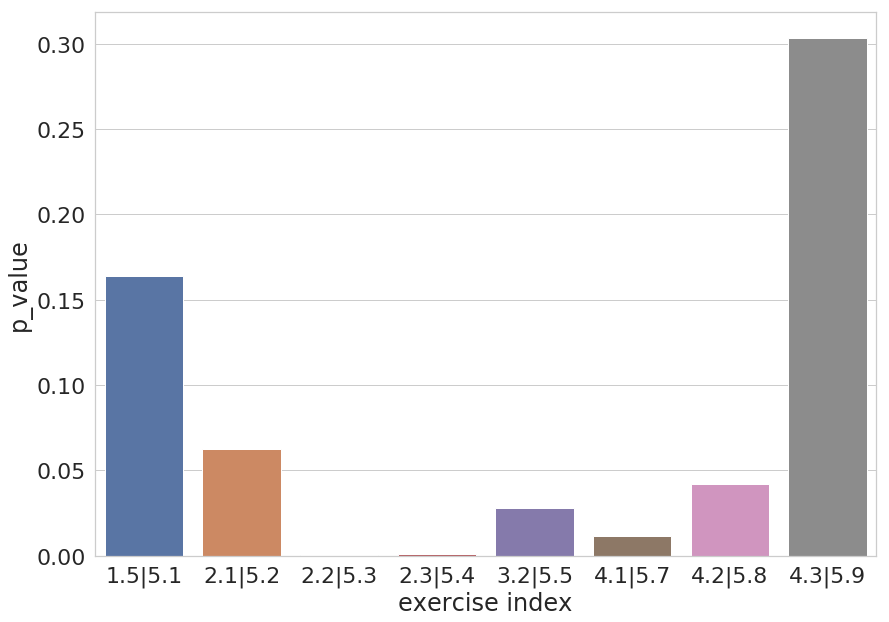

In [197]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="a_p_value", ci=None, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set(ylabel='p_value')

# plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_anova_time_without_title.png", bbox_inches='tight')

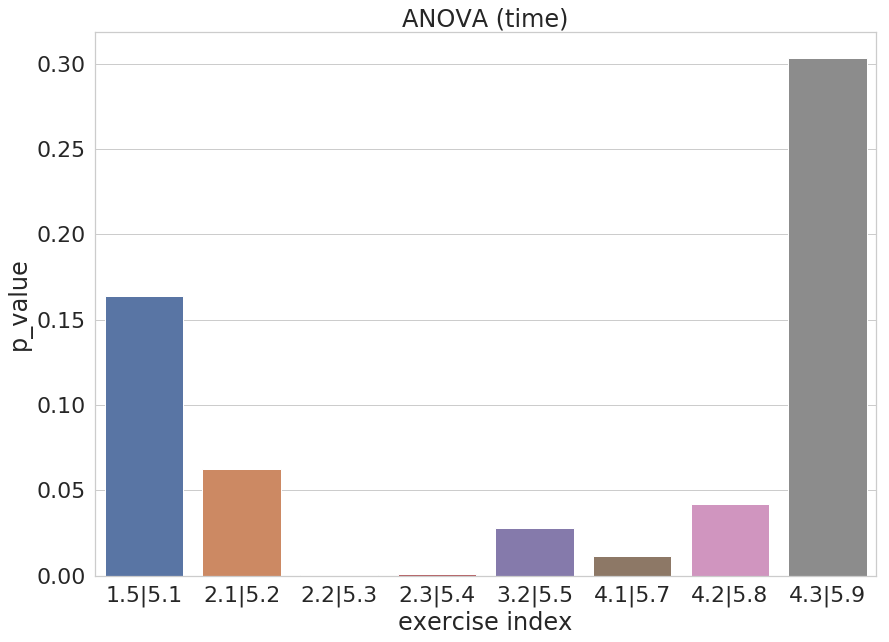

In [198]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="a_p_value", ci=None, data=df_tmp)
ax.set_title('ANOVA (time)')
ax.set(xlabel='exercise index')
ax.set(ylabel='p_value')

# plt.gca().legend().set_title('ANOVA(time)')
plt.savefig("../data/figure/fig_anova_time_with_title.png", bbox_inches='tight')

### Reset index

In [200]:
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]
df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = u_time[u_time['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,exc_num,u_p_value
6,1.5|5.1,0.754023
7,2.1|5.2,0.250592
8,2.2|5.3,0.009023
9,2.3|5.4,0.009023
12,3.2|5.5,0.009023
15,4.1|5.7,0.009023
16,4.2|5.8,0.009023
17,4.3|5.9,0.210075


### Draw diagram(U Test)

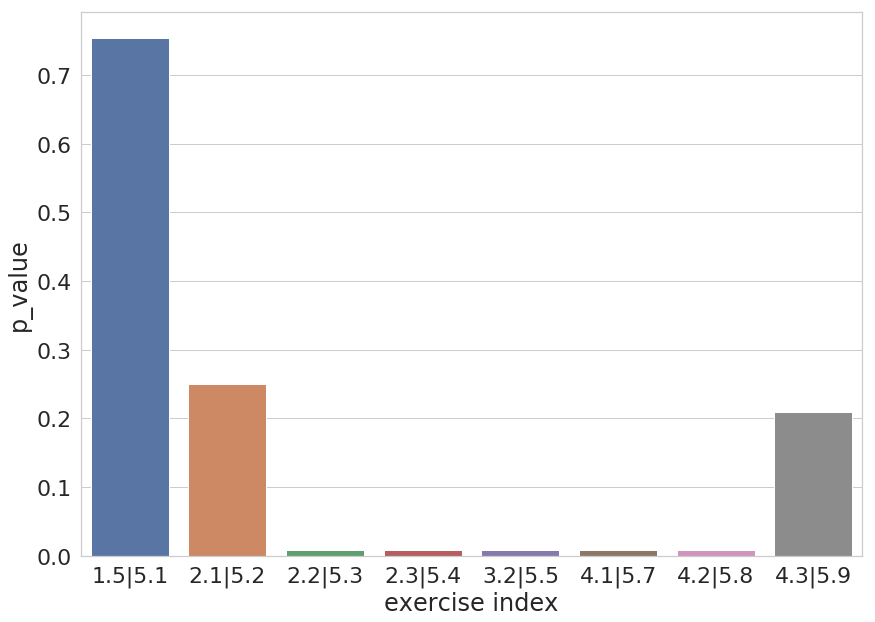

In [201]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="u_p_value", ci=None, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set(ylabel='p_value')
# ax.set_xticklabels(ax.get_xticklabels())

# plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_u_time_without_title.png", bbox_inches='tight')

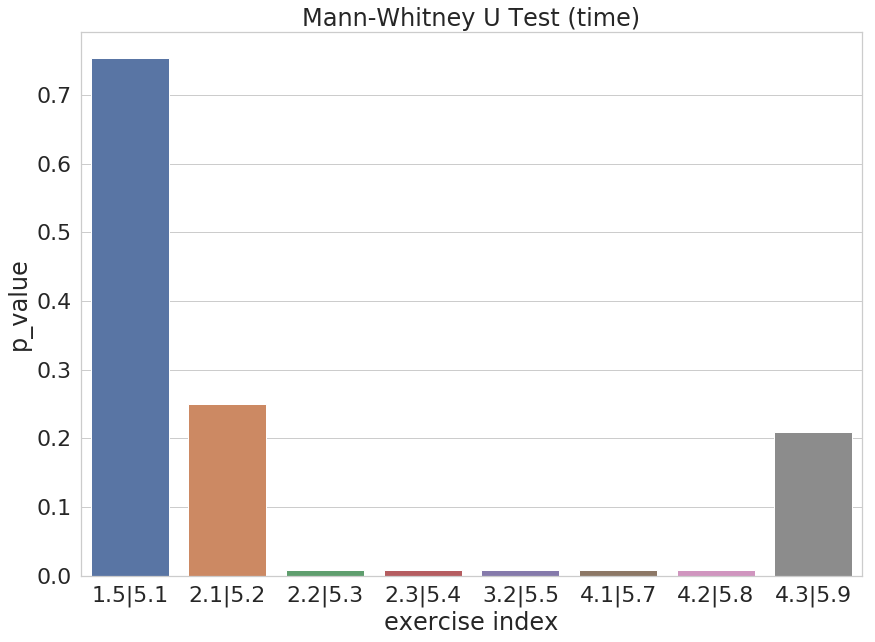

In [202]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="u_p_value", ci=None, data=df_tmp)
ax.set_title('Mann-Whitney U Test (time)')
ax.set(xlabel='exercise index')
ax.set(ylabel='p_value')
# ax.set_xticklabels(ax.get_xticklabels())

plt.savefig("../data/figure/fig_u_time_with_title.png", bbox_inches='tight')

## Table 3.3 ANOVA for selected exercises

In [220]:
at =  df.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum().reset_index()
ave_time = at[['day', 'exc_num', 'uid', 'running_time']].groupby(['day', 'exc_num', 'uid']).mean()
groups = ave_time.reset_index().groupby(['day', 'exc_num'])

for index, group in groups:
    day, exc = index
    if day == 5:
        if exc in selected_exc_last_day:
            selected_exc_data_last_day_time[exc] = group['running_time'].tolist()
    else:
        if exc in selected_exc:
            selected_exc_data_time[exc] = group['running_time'].tolist()


# Diagram 4: Whisker box for diagram 3

## Data processing

In [31]:
df_6_6 = df.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_6_6 = df_6_6.reset_index()

first_attempt = df_6_6.groupby(['uid', 'exc_num']).head(1)
first_attempt = first_attempt.reset_index()

last_attempt = df_6_6.groupby(['uid','exc_num']).tail(1)
last_attempt = last_attempt.reset_index()


last_repetition = df_6_6.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'running_time_y'], axis=1)
last_repetition.columns = ['uid', 'day', 'exc_num', 'running_time']

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt on the last training day'
last_repetition['level'] = 'last repetition in the day of the first attempt'

cols = ['uid', 'exc_num', 'level', 'running_time']
df_6_6 = pd.concat([first_attempt[cols], last_attempt[cols]])
df_6_6

,uid,exc_num,level,running_time
0,1,1,first attempt,108.0
1,1,2,first attempt,59.0
2,1,3,first attempt,83.0
3,1,4,first attempt,139.0
4,1,5,first attempt,111.0
5,1,6,first attempt,64.0
6,1,8,first attempt,94.0
7,1,9,first attempt,111.0
8,1,10,first attempt,122.0
9,1,11,first attempt,552.0


## Reset index

In [32]:
selector = [[12, "3.1|5.1"], [7, "1.8|5.2"],[8,"2.1|5.3"], [9, "2.2|5.4"], [10, "2.3|5.5"], [13, "3.2|5.6"], [14, "3.3|5.7"], [16, "4.1|5.8"], [17,"4.2|5.9"], [18, "4.3|5.10"]]
df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = df_6_6[df_6_6['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,uid,exc_num,level,running_time
10,1,3.1|5.1,first attempt,184.0
29,2,3.1|5.1,first attempt,202.0
48,3,3.1|5.1,first attempt,253.0
69,4,3.1|5.1,first attempt,103.0
86,5,3.1|5.1,first attempt,95.0
105,6,3.1|5.1,first attempt,92.0
124,7,3.1|5.1,first attempt,169.0
143,8,3.1|5.1,first attempt,104.0
161,10,3.1|5.1,first attempt,96.0
180,11,3.1|5.1,first attempt,73.0


## Draw diagram

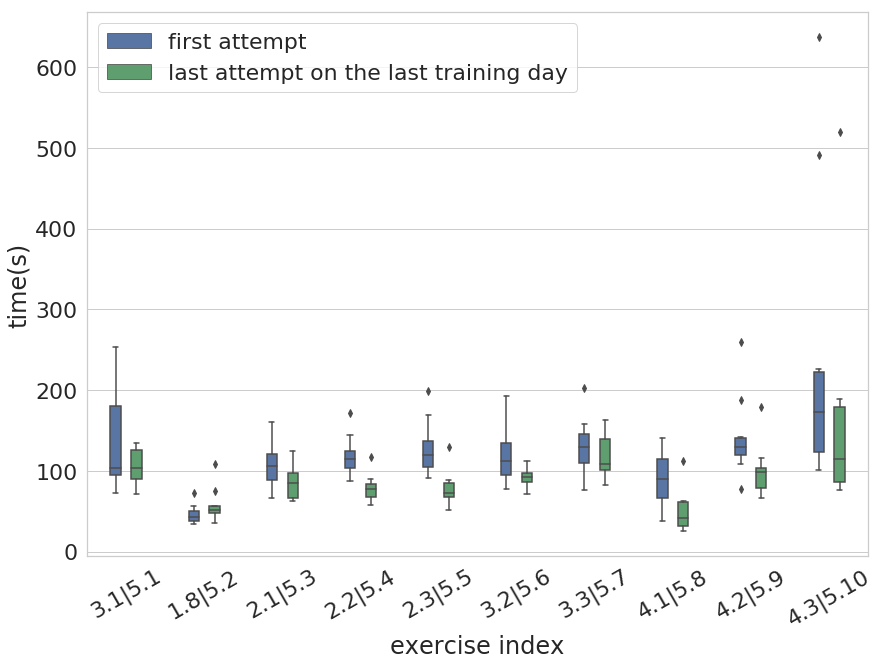

In [33]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.boxplot(x="exc_num", y="running_time", hue='level', data=df_6_6)

ax = sns.boxplot(x="exc_num", y="running_time", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index', ylabel='time(s)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_6_whisker_box_time.png", bbox_inches='tight')

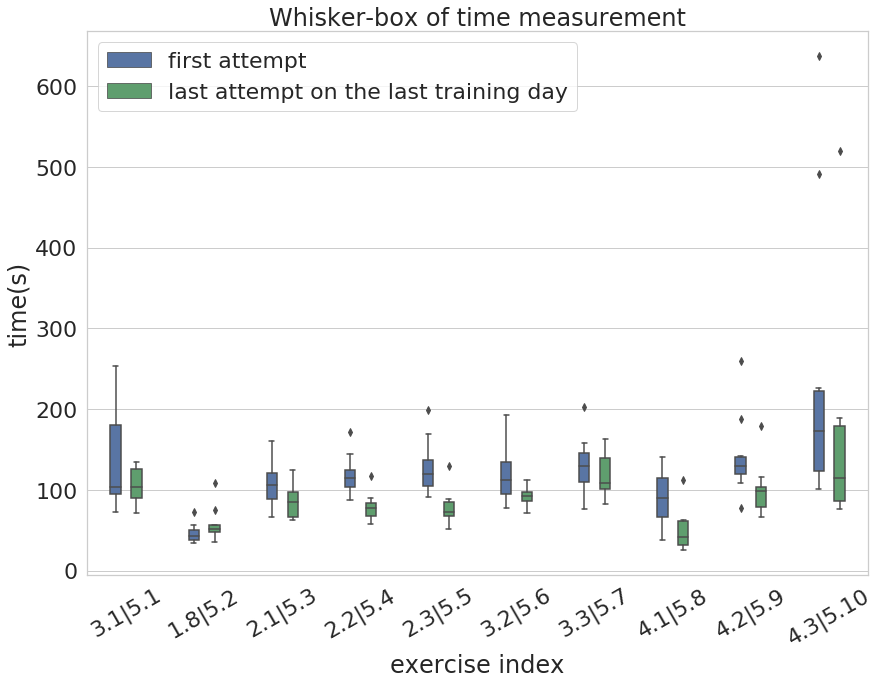

In [34]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.boxplot(x="exc_num", y="running_time", hue='level', data=df_6_6)

ax = sns.boxplot(x="exc_num", y="running_time", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index', ylabel='time(s)')
ax.set_title('Whisker-box of time measurement')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_6_whisker_box_time_with_title.png", bbox_inches='tight')

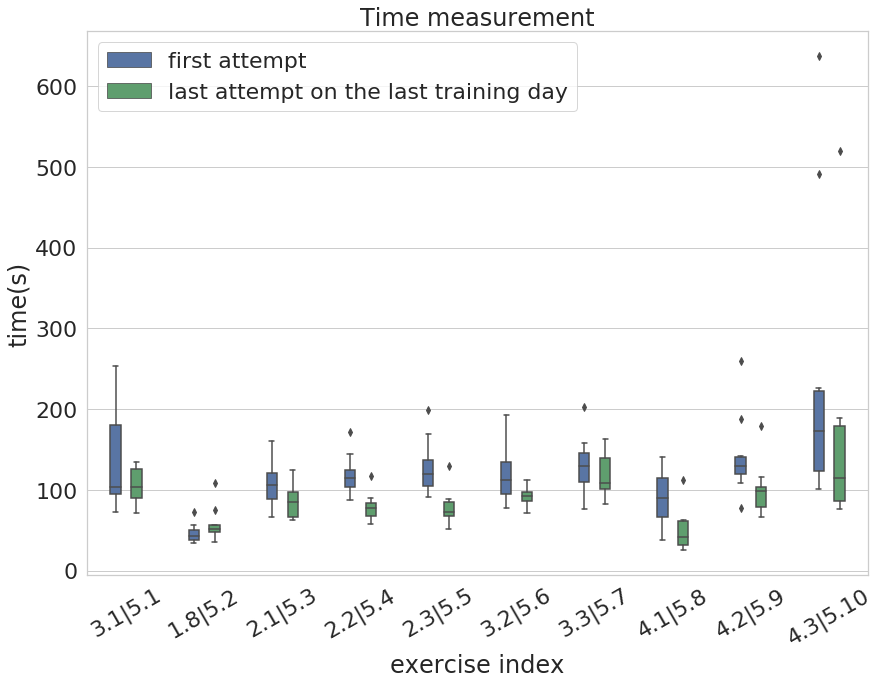

In [35]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.boxplot(x="exc_num", y="running_time", hue='level', data=df_6_6)

ax = sns.boxplot(x="exc_num", y="running_time", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index', ylabel='time(s)')
ax.set_title('Time measurement')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_6_whisker_box_time_with_same_title.png", bbox_inches='tight')

# Diagram 5: Correlation between score and time

## Data processing

In [36]:
df_score = pd.read_csv('../data/all_data.csv')
df_score = calc_force(df_score)
df_score = calc_velocity(df_score)
df_score = calc_score(df_score)
df_score = df_score.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
                      'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)
df_score_nnp = df_score.dropna()

df_score = df_score[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_score_nnp = df_score_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_score = df_score.reset_index()
df_score_nnp = df_score_nnp.reset_index() 
df_score
df_time = pd.read_csv('../data/running_time.csv')
df_time = df_time.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_time = df_time.reset_index()

df_6_7 = df_time.merge(df_score, on=['uid', 'day', 'exc_num', 'exc_times'], how='inner')
df_6_7 = df_6_7[['uid', 'running_time', 'score']]
df_6_7_nnp = df_time.merge(df_score_nnp, on=['uid', 'day', 'exc_num', 'exc_times'], how='inner')
df_6_7_nnp = df_6_7_nnp[['uid', 'running_time', 'score']]
df_6_7_nnp.head()

,uid,running_time,score
0,1,108.0,21.747808
1,1,78.0,14.700025
2,1,72.0,9.963524
3,1,59.0,6.354035
4,1,49.0,6.829834


## Draw diagram

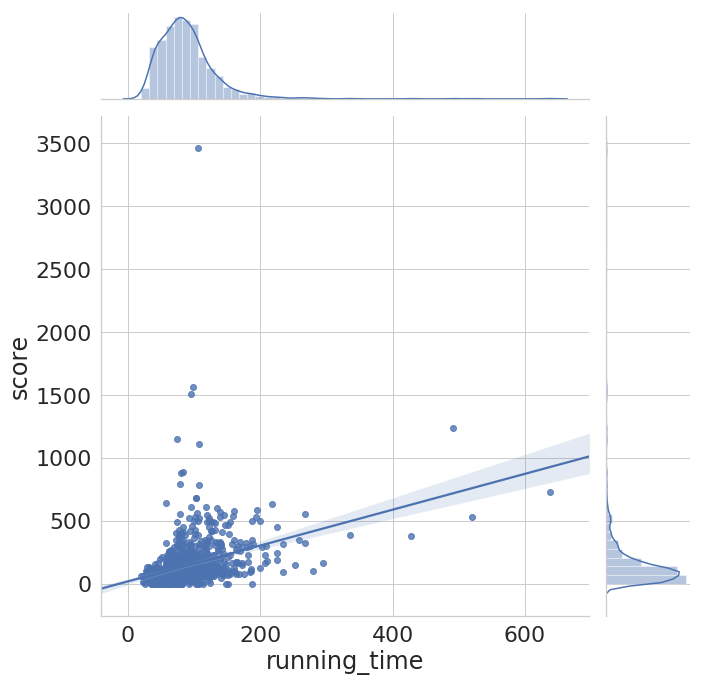

In [37]:
# sns.set_style('whitegrid')
# f, ax= plt.subplots(figsize = (14, 10))

# g  = sns.jointplot(x="running_time", y="score", data=df_6_7, kind="reg")
g = sns.JointGrid(x="running_time", y="score", data=df_6_7, height=10)
g = g.plot(sns.regplot, sns.distplot)

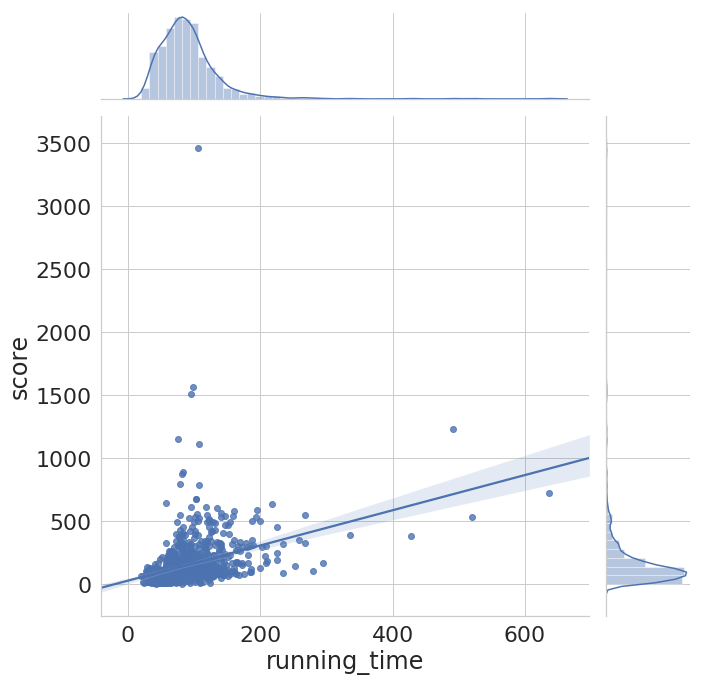

In [38]:
g = sns.JointGrid(x="running_time", y="score", data=df_6_7_nnp, height=10)
g = g.plot(sns.regplot, sns.distplot)

# Diagram 5: Exercise with and without force 

## Data processing

In [39]:
# exercise 3: line without force
# exercise 6: line with force
df_6_8 = df_nnp[(df_nnp['exc_num']==3) | (df_nnp['exc_num']==6)]
df_6_8_velocity = df_6_8[['uid', 'velocity']].groupby(['uid']).mean()
df_6_8_score = df_6_8[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day','exc_num', 'exc_times', 'uid']).sum()
df_6_8_score = df_6_8_score.reset_index()
# df_6_8_score = df_6_8_score[['uid', 'exc_num', 'score']].groupby(['uid', 'exc_num']).mean()
# df_6_8_score = df_6_8_score.reset_index()
df_6_8 = df_6_8_score.merge(df_6_8_velocity, on=['uid'], how='inner')
df_6_8 = df_6_8.reset_index()
df_6_8 = df_6_8.sort_values('velocity')
df_6_8['velocity'] = df_6_8['velocity'].apply(lambda x: round(x, 2))
df_6_8['uid'] = df_6_8['uid'].astype('str').apply(lambda x: x.zfill(3))
df_6_8['x_axis'] = df_6_8['velocity'].astype('str')
df_6_8['x_axis'] = df_6_8['x_axis'] + '(' + df_6_8['uid'] + ')'

df_6_8['exc_num'][df_6_8['exc_num']==3] = 'without force'
df_6_8['exc_num'][df_6_8['exc_num']==6] = 'with force'
df_6_8['Exercise'] = df_6_8['exc_num']
df_6_8

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,index,day,exc_num,exc_times,uid,score,velocity,x_axis,Exercise
100,100,2,with force,2,010,51.883182,0.22,0.22(010),with force
99,99,2,with force,1,010,17.401196,0.22,0.22(010),with force
98,98,1,with force,5,010,38.258289,0.22,0.22(010),with force
97,97,1,with force,4,010,28.352798,0.22,0.22(010),with force
96,96,1,with force,3,010,32.325234,0.22,0.22(010),with force
95,95,1,with force,2,010,28.223004,0.22,0.22(010),with force
94,94,1,with force,1,010,28.340190,0.22,0.22(010),with force
93,93,1,without force,2,010,6.824779,0.22,0.22(010),without force
92,92,1,without force,1,010,8.905710,0.22,0.22(010),without force
101,101,2,with force,3,010,46.192114,0.22,0.22(010),with force


## Draw diagram

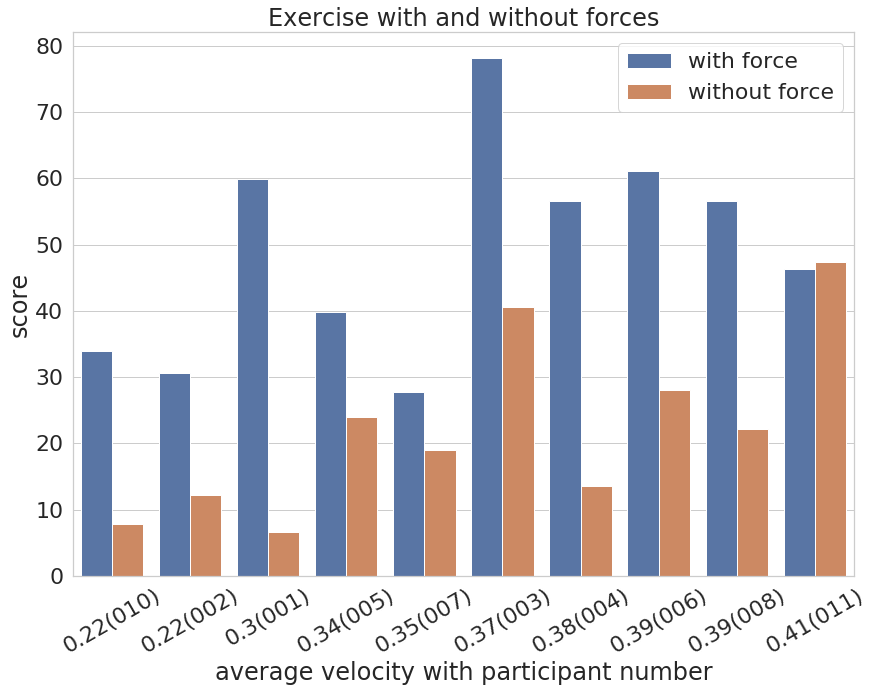

In [40]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", hue='Exercise', ci=None, data=df_6_8)
ax.set_title('Exercise with and without forces')
ax.set(xlabel='average velocity with participant number', ylabel='score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_average_score_c5_with_title.png", bbox_inches='tight')


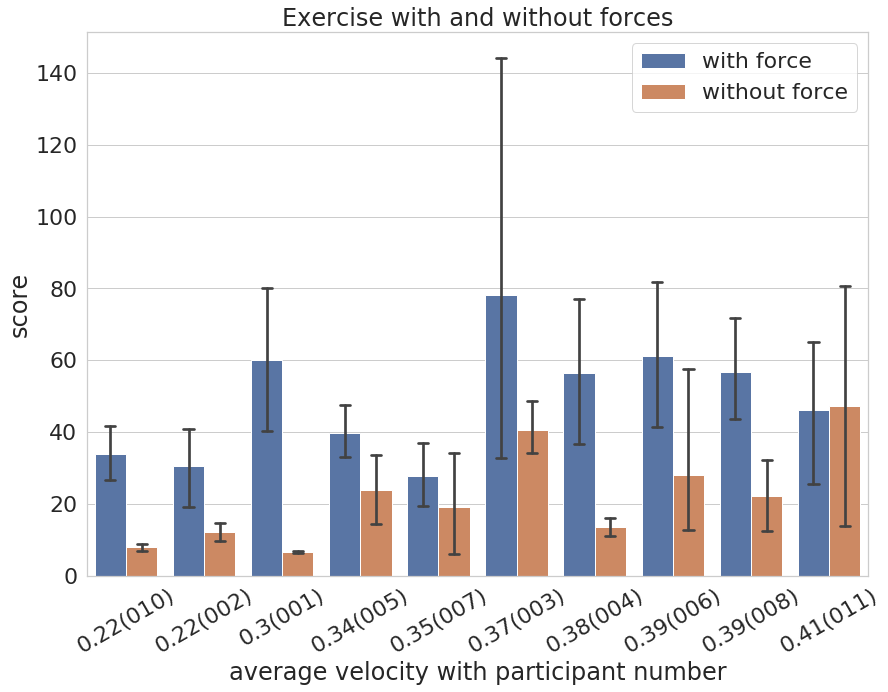

In [41]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", hue='Exercise', capsize=.13, data=df_6_8)
ax.set_title('Exercise with and without forces')
ax.set(xlabel='average velocity with participant number', ylabel='score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_average_score_c5_with_title_stddev.png", bbox_inches='tight')


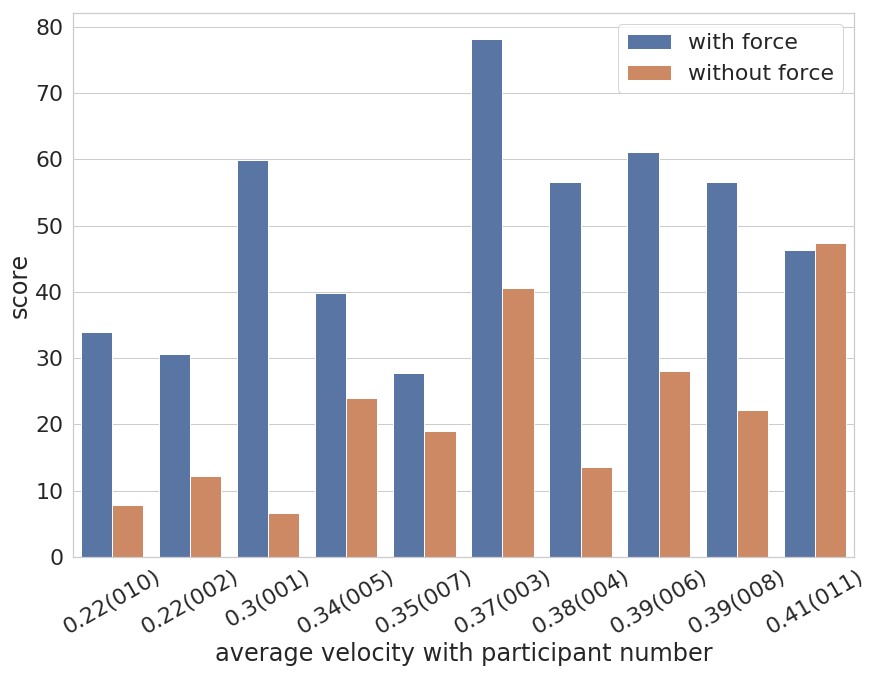

In [42]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", hue='Exercise', ci=None, data=df_6_8)
ax.set(xlabel='average velocity with participant number', ylabel='score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_average_score_c5_without_title.png", bbox_inches='tight')

In [43]:
# sns.set_style('whitegrid')
# f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.barplot(x="x_axis", y="score", hue='Exercise', data=df_6_8)
# ax.set(xlabel='average velocity with participant number', ylabel='score')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
# plt.gca().legend().set_title('')
# plt.savefig("../data/figure/fig6_8_average_score_c5_without_title.png", bbox_inches='tight')

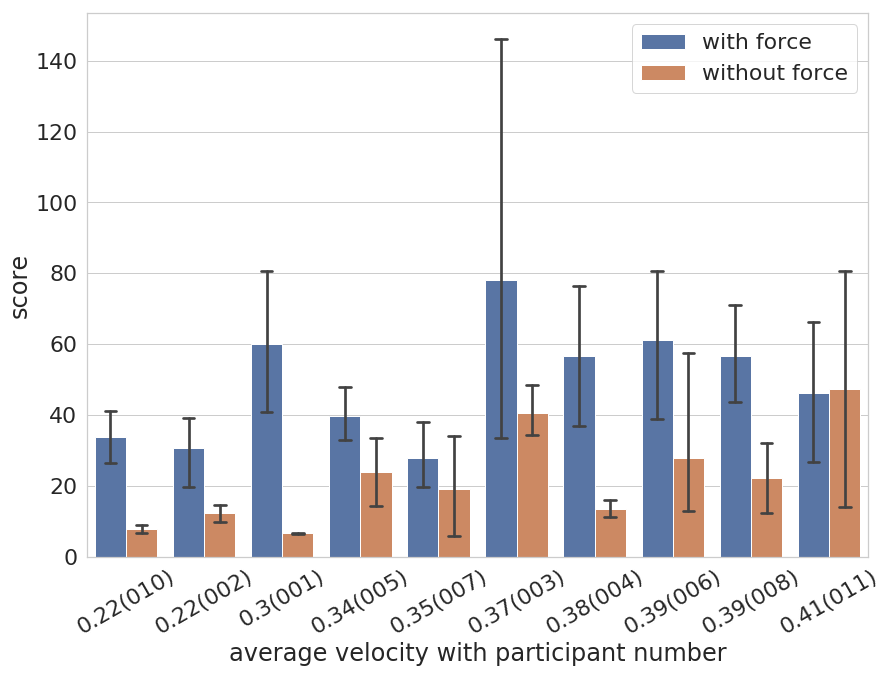

In [44]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", hue='Exercise', capsize=.15, data=df_6_8)
ax.set(xlabel='average velocity with participant number', ylabel='score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_average_score_c5_without_title_stddev.png", bbox_inches='tight')


In [103]:
anova_force_tmp = df_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
anova_force_tmp = anova_force_tmp.reset_index()[['exc_num', 'uid', 'score']].groupby(['exc_num', 'uid']).mean().reset_index()
# anova_force_tmp[anova_force_tmp['exc_num']==3].set_index(['uid'])['score']
anova_force_tmp = pd.concat([anova_force_tmp[anova_force_tmp['exc_num']==3].set_index(['uid'])['score'],
                   anova_force_tmp[anova_force_tmp['exc_num']==6].set_index(['uid'])['score']], 
                   join='inner', axis=1)
anova_force_tmp.columns=['wf_score', 'f_score']
anova_force_tmp = anova_force_tmp.reset_index()

# u test
uids = anova_force_tmp['uid'].unique()
#     index_a = random.sample(set(uids), int(len(uids)/2))
index_a = [1,2,3,4,5]
index_b = list(set(uids).difference(index_a))
    
a = anova_force_tmp.set_index(['uid']).loc[index_a, 'wf_score']
b = anova_force_tmp.set_index(['uid']).loc[index_b, 'f_score']

    
_, u_p_value = ranksums(a,b)
    
# ANOVA
F_value, a_p_value = f_oneway(anova_force_tmp['wf_score'], anova_force_tmp['f_score'])
print(a_p_value)
tmp = pd.DataFrame(np.array([36, 'force', a_p_value, u_p_value]).reshape(1,4), columns=['exc', 'type', 'ANOVA', 'U-test'] )
table = pd.concat([table, tmp])
table


0.000749655743134


,exc,type,ANOVA,U-test
0,3,score,0.14622,0.250592
1,4,score,0.146235,0.0758002
2,5,score,0.468116,0.464702
3,6,score,0.00435294,0.0758002
4,7,score,0.000308515,0.0282801
5,8,score,0.00976745,0.0758002
6,9,score,0.036152,0.250592
7,10,score,0.0442244,0.0282801
8,12,score,0.00703146,0.0758002
9,13,score,0.00161269,0.00902344


# Diagram 6: Assessment of every exercises

## Data processing

In [46]:

# df = pd.read_csv('../data/DATA.csv', header=1)
# all_columns = df.columns
# time_columns = []
# assessment_columns = []
# for c in all_columns:
#     if 'time' in c:
#         time_columns.append(c)
#     elif 'question' in c:
#         assessment_columns.append(c)
        
# df = df[['Subject_ID']+assessment_columns]
# new_df = pd.DataFrame()
# for c in assessment_columns:
#     df_tmp = df[['Subject_ID', c]]
#     df_curr = pd.DataFrame([], columns=['uid', 'day', 'task', 'question', 'assessment'])
    
#     p = '(^day)(\d)(\_)(task|end)(\d*)(\_)(question)(\d)'
#     result = re.match(p, c)
#     day = result.groups()[1]
#     task = result.groups()[4]
#     if task == '':
#         task = '0'
#     question = result.groups()[7]
    
#     df_curr['uid'] = df['Subject_ID']
#     df_curr['day'] = day
#     df_curr['task'] = task
#     df_curr['question'] = question
#     df_curr['assessment'] = df_tmp[c].apply(lambda x: x[0])
    
#     new_df = pd.concat([new_df, df_curr])
    
# new_df = new_df[new_df['assessment']!='.']
# new_df.to_csv('../data/assessment.csv', index=False)

df = pd.read_csv('../data/assessment.csv') # """
df.head()

,uid,day,task,question,assessment
0,Heika_001 ...,1,3,1,2
1,Heika_002 ...,1,3,1,1
2,Heika_003 ...,1,3,1,1
3,Heika_004 ...,1,3,1,2
4,Heika_005 ...,1,3,1,1


## Exercise Selection

In [48]:
# days_codes = ['d1\_e3', 'd1\_e4', 'd1\_e5', 'd1\_e6', 'd1\_e7', 'd2\_e2', 'd2\_e3',
#               'd2\_e4', 'd3\_e1', 'd3\_e2', 'd3\_e3', 'd3\_e4', 'd3\_e5','d4\_e1', 'd4\_e2',
#               'd4\_e3', 'd4\_e4', 'd5\_e1',  'd5\_e2', 'd5\_e3', 'd5\_e4', 'd5\_e5', 'd5\_e6',
#               'd5\_e7', 'd5\_e8', 'd5\_e9', 'd5\_e10']
# df_tmp = pd.DataFrame()
# for code in days_codes:
#     p = '(^d)(\d)(\\\_)(e)(\d*)'
#     result = re.match(p, code)
#     day = result.groups()[1]
#     task = result.groups()[4]
#     df_curr = df[(df['day'] == int(day)) & (df['task'] == int(task))]
#     df_curr['x_axis'] = day+'.'+task
#     df_tmp = pd.concat([df_tmp, df_curr])
    
# average_ass = df_tmp[['day', 'task', 'question', 'assessment']].groupby(['day', 'task', 'question']).mean()
# average_ass = average_ass.reset_index()
# average_ass['x_axis'] = average_ass['day'].astype(str)+'.'+average_ass['task'].astype(str)



# average_ass['question'][average_ass['question']==1] = 'Q. 1'
# average_ass['question'][average_ass['question']==2] = 'Q. 2'
# whisker_ass = df_tmp[['x_axis', 'question', 'assessment']]
# whisker_ass['question'][whisker_ass['question']==1] = 'Q. 1'
# whisker_ass['question'][whisker_ass['question']==2] = 'Q. 2'

# average_ass = average_ass.sort_values(by=['day', 'task'])
# index_order = average_ass['x_axis'].unique()

### uid tranformation

In [49]:
df['uid'] = df['uid'].apply(lambda x:int(x[7:]))

In [50]:
days_codes = ['d1\_e3', 'd1\_e4', 'd1\_e5', 'd1\_e6', 'd1\_e7', 'd2\_e2', 'd2\_e3',
              'd2\_e4', 'd3\_e1', 'd3\_e2', 'd3\_e3', 'd3\_e4', 'd3\_e5','d4\_e1', 'd4\_e2',
              'd4\_e3', 'd4\_e4', 'd5\_e1',  'd5\_e2', 'd5\_e3', 'd5\_e4', 'd5\_e5', 'd5\_e6',
              'd5\_e7', 'd5\_e8', 'd5\_e9', 'd5\_e10']
df_tmp = pd.DataFrame()
for code in days_codes:
    p = '(^d)(\d)(\\\_)(e)(\d*)'
    result = re.match(p, code)
    day = result.groups()[1]
    task = result.groups()[4]
    df_curr = df[(df['day'] == int(day)) & (df['task'] == int(task))]
    df_curr['x_axis'] = day+'.'+task
    df_tmp = pd.concat([df_tmp, df_curr])
    
average_ass = df_tmp[['uid', 'day', 'task', 'question', 'assessment']] #.groupby(['day', 'task', 'question']).mean()
# average_ass = average_ass.reset_index()
average_ass['x_axis'] = average_ass['day'].astype(str)+'.'+average_ass['task'].astype(str)



average_ass['question'][average_ass['question']==1] = 'Q. 1'
average_ass['question'][average_ass['question']==2] = 'Q. 2'
whisker_ass = df_tmp[['x_axis', 'question', 'assessment']]
whisker_ass['question'][whisker_ass['question']==1] = 'Q. 1'
whisker_ass['question'][whisker_ass['question']==2] = 'Q. 2'

average_ass = average_ass.sort_values(by=['day', 'task'])
index_order = average_ass['x_axis'].unique()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:7624: SettingWithCop

## Reset index

In [51]:
selector = [[1.3, 1.1],[1.4,1.2], [1.5, 1.3], [1.6, 1.4], [1.7, 1.5], [2.2, 2.1], [2.3, 2.2], [2.4, 2.3]
           ,[3.2, 3.1], [3.3, 3.2], [3.4,3.3], [3.5,3.4], [4.2, 4.1], [4.3,4.2],[4.4, 4.3], [5.1,5.1],[5.2,5.2],[5.3,5.3],
           [5.4,5.4], [5.5,5.5],[5.6,5.6],[5.7,5.7],[5.8,5.8],[5.9,5.9], ["5.10", "5.10"]]
           

df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = average_ass[average_ass['x_axis']==str(num)]
    df_curr['x_axis'] = str(string)
    df_tmp = pd.concat([df_tmp, df_curr])
    
# df_tmp
index_order = df_tmp['x_axis'].unique()
aa = df_tmp
df_tmp.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,uid,day,task,question,assessment,x_axis
0,1,1,3,Q. 1,2,1.1
1,2,1,3,Q. 1,1,1.1
2,3,1,3,Q. 1,1,1.1
3,4,1,3,Q. 1,2,1.1
4,5,1,3,Q. 1,1,1.1


In [65]:
# selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [14, "3.3|5.6"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]
pairs = [[1.5, 5.1], [2.1, 5.2], [2.2, 5.3], [2.3, 5.4], [3.2, 5.5], [3.3, 5.6], [4.1, 5.7], [4.2, 5.8], [4.3, 5.9]]
    
df_tmp
assess_tmp = df_tmp[df_tmp['x_axis']!='5.10']
assess_ANOVA_table = pd.DataFrame(np.array([]).reshape(0,4), columns=['exc', 'type', 'question', 'ANOVA'])
assess_U_table = pd.DataFrame(np.array([]).reshape(0,4), columns=['exc', 'type', 'question', 'U-Test'])

a_p_values1 = []
a_p_values2 = []
for pair in pairs:
    
    # ANOVA
    first_index, last_index = pair
#     print(pair)
    first = assess_tmp[assess_tmp['x_axis'].astype(float) == first_index][['assessment', 'question']]
    last = assess_tmp[assess_tmp['x_axis'].astype(float) == last_index][['assessment', 'question']]
    
    
    first1 = first[first['question']=='Q. 1']['assessment']
    first2 = first[first['question']=='Q. 2']['assessment']
    
    last1 = last[last['question']=='Q. 1']['assessment']
    last2 = last[last['question']=='Q. 2']['assessment']
    
    exc = str(first_index)+'|'+str(last_index)
    
    _, a_p_value = f_oneway(first1, last1)
    a_p_values1.append(a_p_value)
   
    
    tmp = pd.DataFrame(np.array([exc, 'assessment', 1, a_p_value]).reshape(1,4), 
                       columns=['exc', 'type', 'question', 'ANOVA'])
    assess_ANOVA_table = assess_ANOVA_table.append(tmp)
    
    _, a_p_value = f_oneway(first2, last2)
    a_p_values2.append(a_p_value)
    tmp = pd.DataFrame(np.array([exc, 'assessment', 2, a_p_value]).reshape(1,4), 
                       columns=['exc', 'type', 'question', 'ANOVA'])
    assess_ANOVA_table = assess_ANOVA_table.append(tmp)
    
    # U-Test
    
    first = assess_tmp[assess_tmp['x_axis'].astype(float) == first_index][['assessment', 'question', 'uid']]
    last = assess_tmp[assess_tmp['x_axis'].astype(float) == last_index][['assessment', 'question', 'uid']]
    last_uids = last['uid'].unique()
    
    index_a = [1,2,3,4,5]
    index_b = list(set(last_uids).difference(index_a))
    
    
    first = first.set_index(['uid']).loc[index_a].reset_index(drop=True)
    last = last.set_index(['uid']).loc[index_b].reset_index(drop=True)
    first1 = first[first['question']=='Q. 1']['assessment']
    first2 = first[first['question']=='Q. 2']['assessment']
    
    last1 = last[last['question']=='Q. 1']['assessment']
    last2 = last[last['question']=='Q. 2']['assessment']
    
    _, a_p_value = ranksums(first1, last1)
    tmp = pd.DataFrame(np.array([exc, 'assessment', 1, a_p_value]).reshape(1,4), 
                       columns=['exc', 'type', 'question', 'U-Test'])
    assess_U_table = assess_U_table.append(tmp)
    
    _, a_p_value = ranksums(first2, last2)
    tmp = pd.DataFrame(np.array([exc, 'assessment', 2, a_p_value]).reshape(1,4), 
                       columns=['exc', 'type', 'question', 'U-Test'])
    assess_U_table = assess_U_table.append(tmp)
    
#     print(1)
#     print(first1)
#     print(2)
#     print(last1)

# assess_ANOVA_table.to_csv('../data/assess_ANOVA.csv', index='drop')
# assess_ANOVA_table
assess_U_table.to_csv('../data/assess_U.csv', index='drop')
    

In [162]:
assess_table = df_tmp
assess_table = assess_table[['question', 'x_axis', 'assessment']].groupby(['question', 'x_axis']).agg({'min', 'max', 'median'}, axis=1)
assess_table.columns = assess_table.columns.droplevel(0)
assess_table = assess_table.reset_index()
assess_table.to_csv('../data/all_assessment.csv', index=False)

## Draw diagram

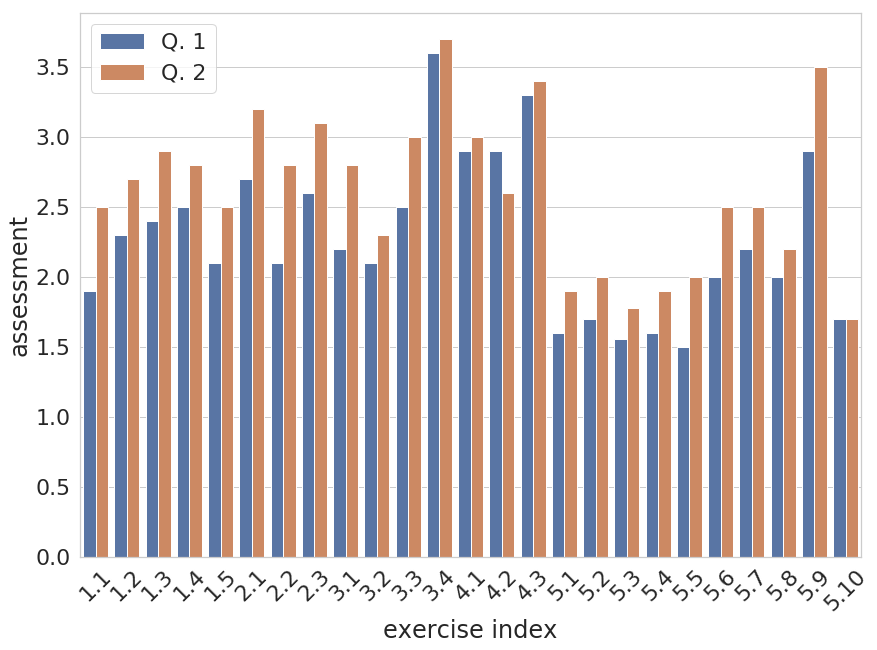

In [123]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', ci=None, data=df_tmp, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_assessment_without_title.png", bbox_inches='tight')


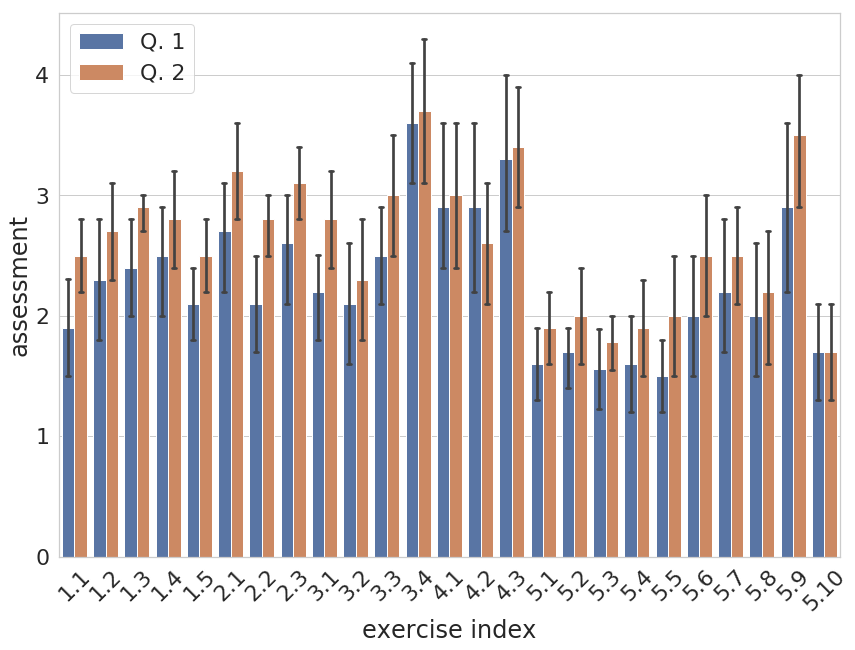

In [50]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', capsize=.13, data=df_tmp, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_assessment_without_title_stddev.png", bbox_inches='tight')


In [51]:
# sns.set_style('whitegrid')
# f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.barplot(x="x_axis", y="assessment", hue='question', data=df_tmp, order=index_order)
# ax.set(xlabel='exercise index', ylabel='assessment')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.gca().legend().set_title('')
# plt.savefig("../data/figure/fig6_8_assessment_without_title_.png", bbox_inches='tight')


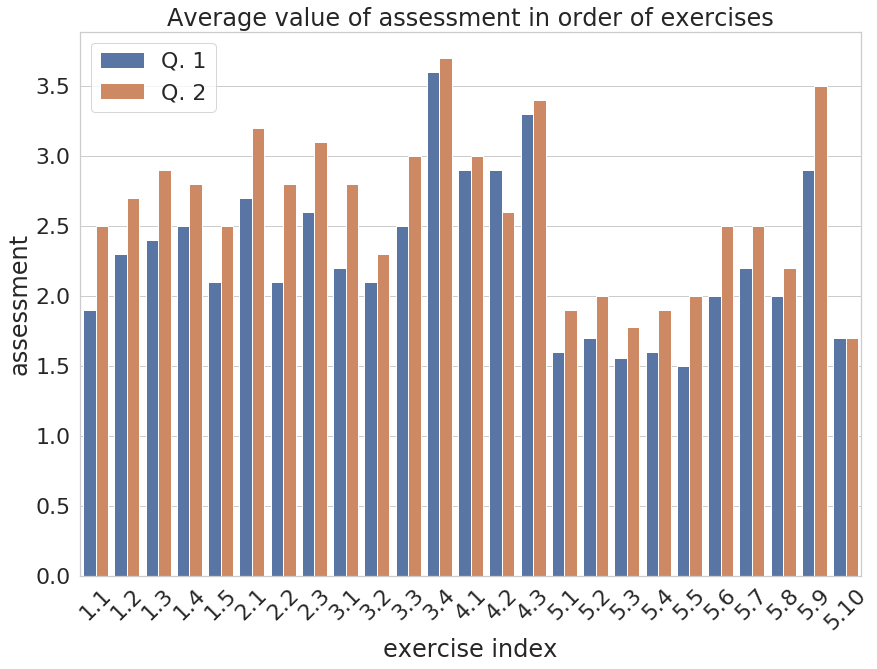

In [52]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', ci=None, data=df_tmp, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Average value of assessment in order of exercises')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_assessment_with_title.png", bbox_inches='tight')


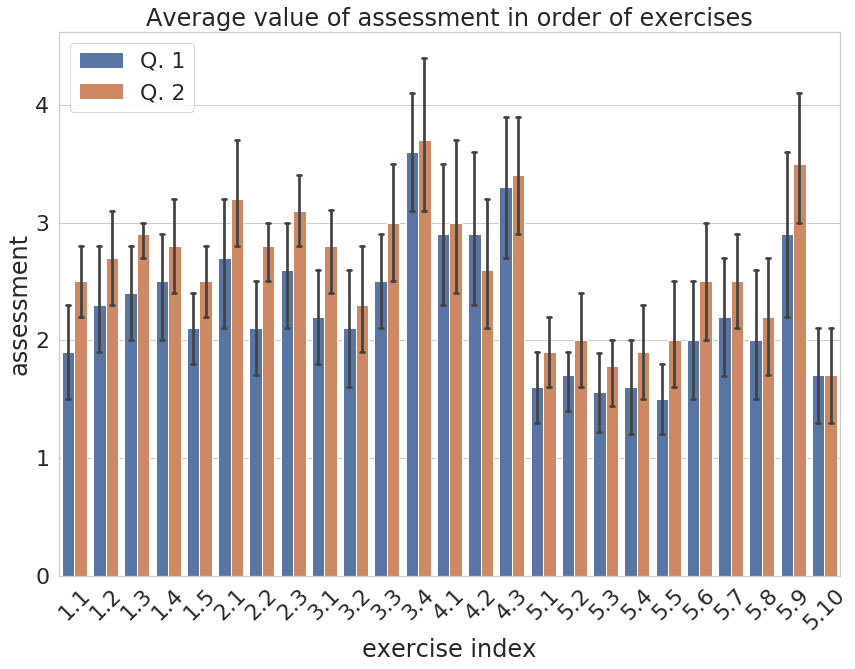

In [54]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', capsize=.13, data=df_tmp, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Average value of assessment in order of exercises')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_assessment_with_title_stddev.png", bbox_inches='tight')

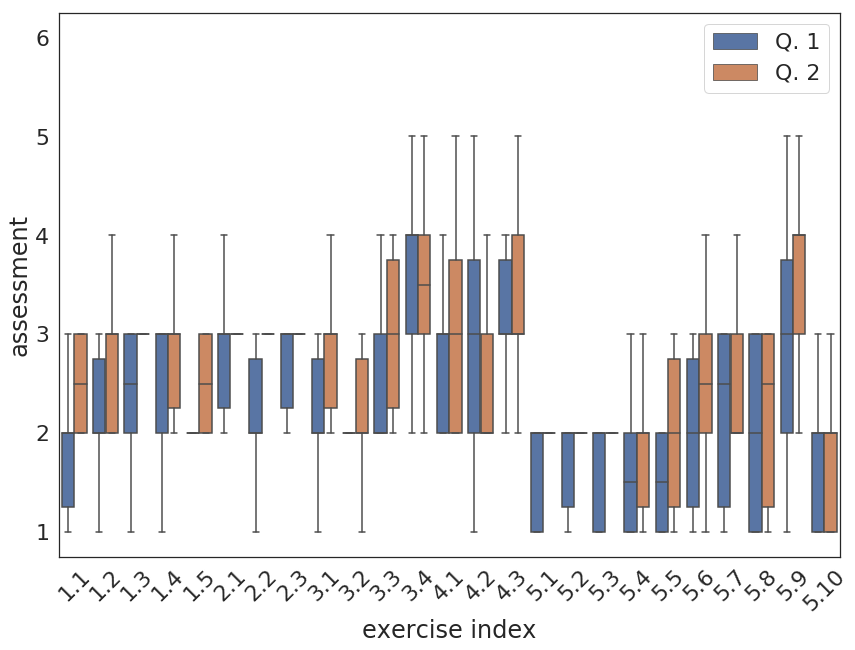

In [175]:
sns.set_style('white')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="x_axis", y="assessment", hue='question', fliersize=0, data=df_tmp, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/boxplot_assessment_without_title.png", bbox_inches='tight')


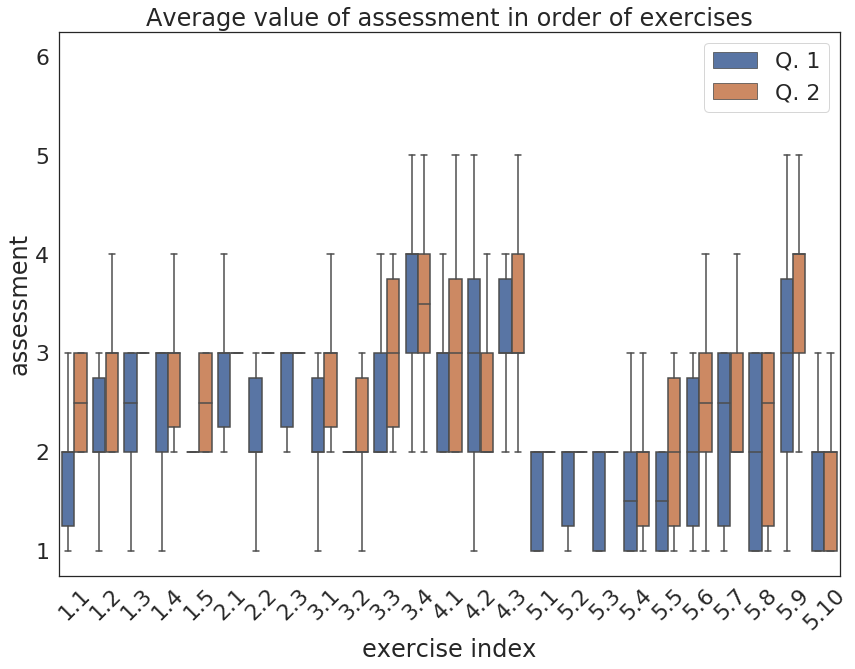

In [176]:
sns.set_style('white')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="x_axis", y="assessment", hue='question', fliersize=0, data=df_tmp, order=index_order)
ax.set_title('Average value of assessment in order of exercises')
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/boxplot_assessment_with_title.png", bbox_inches='tight')


## 6.2 Table ANOVA for selected exercises

In [232]:
# aa = df_tmp
excs = [1.2, 1.4, 2.2, 4.3, 5.3, 5.5, 2.3, 4.2, 5.4, 5.8]
groups = aa.reset_index().groupby(['day', 'x_axis'])

for index, group in groups:
    day, exc = index
    
    if float(exc) in excs:
        selected_exc_data_all_assess1[float(exc)] = group[group['question']=='Q. 1']['assessment'].tolist()
        selected_exc_data_all_assess2[float(exc)] = group[group['question']=='Q. 2']['assessment'].tolist()
selected_exc_data_all_assess1

{'1.2': [2, 1, 2, 2, 2, 3, 2, 3, 4, 2],
 '1.4': [2, 1, 3, 3, 2, 3, 2, 3, 3, 3],
 '2.2': [2, 1, 2, 2, 2, 1, 3, 3, 2, 3],
 '2.3': [2, 1, 2, 3, 3, 3, 3, 3, 3, 3],
 '4.2': [2, 1, 2, 5, 3, 4, 3, 4, 3, 2],
 '4.3': [2, 3, 3, 5, 3, 3, 4, 3, 5, 2],
 '5.3': [1, 1, 2, 1, 2, 2, 2, 2, 1],
 '5.4': [1, 1, 1, 3, 1, 2, 2, 2, 2, 1],
 '5.5': [1, 1, 1, 2, 1, 2, 2, 2, 2, 1],
 '5.8': [1, 1, 1, 3, 3, 2, 2, 3, 3, 1],
 1.2: [2, 1, 2, 2, 2, 3, 2, 3, 4, 2],
 1.4: [2, 1, 3, 3, 2, 3, 2, 3, 3, 3],
 2.2: [2, 1, 2, 2, 2, 1, 3, 3, 2, 3],
 2.3: [2, 1, 2, 3, 3, 3, 3, 3, 3, 3],
 4.2: [2, 1, 2, 5, 3, 4, 3, 4, 3, 2],
 4.3: [2, 3, 3, 5, 3, 3, 4, 3, 5, 2],
 5.3: [1, 1, 2, 1, 2, 2, 2, 2, 1],
 5.4: [1, 1, 1, 3, 1, 2, 2, 2, 2, 1],
 5.5: [1, 1, 1, 2, 1, 2, 2, 2, 2, 1],
 5.8: [1, 1, 1, 3, 3, 2, 2, 3, 3, 1]}

# Diagram 7: Daily Assessment

## Data processing

In [55]:
# day_ass = df[df['task'] == 0]
# day_ass = day_ass[['day', 'question', 'assessment']].groupby(['day', 'question']).mean()
# day_ass = day_ass.reset_index()
# day_ass['question'] = 'Q. ' + day_ass['question'].astype(str)

In [67]:
day_ass = df[df['task'] == 0]
# day_ass = day_ass[['day', 'question', 'assessment']].groupby(['day', 'question']).mean()
# day_ass = day_ass.reset_index()
day_ass['question'] = 'Q. ' + day_ass['question'].astype(str)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [168]:
day_ass_table = day_ass[['day', 'question', 'assessment']]
day_ass_table = day_ass_table[['question', 'day', 'assessment']].groupby(['question', 'day']).agg({'min', 'max', 'median'}, axis=1)
day_ass_table.columns = day_ass_table.columns.droplevel(0)
day_ass_table = day_ass_table.reset_index()
day_ass_table.to_csv('../data/day_assessment.csv', index=False)
# day_ass_table

In [72]:
day_ass_ANOVA = pd.DataFrame(np.array([]).reshape(0, 4), columns=['day', 'type', 'question', 'ANOVA'])
day_ass_U = pd.DataFrame(np.array([]).reshape(0, 4), columns=['day', 'type', 'question', 'U-Test'])

tmp = day_ass
for i in xrange(4):
    day = i+1
    
    # ANOVA
    baseline1 = tmp[(tmp['day'] == day) & (tmp['question']=='Q. 1')]['assessment']
    baseline2 = tmp[(tmp['day'] == day) & (tmp['question']=='Q. 2')]['assessment']
    baseline3 = tmp[(tmp['day'] == day) & (tmp['question']=='Q. 3')]['assessment']
    cnt = day
    test1 = []
    test2 = []
    test3 = []

    exc = str(day)+'|'
    
    # U-Test
    uids = tmp['uid'].unique()
    index_a = [1,2,3,4,5]
    index_b = list(set(last_uids).difference(index_a))
    
    
    ubase = tmp.set_index(['uid']).loc[index_a].reset_index()
    ubase = ubase[ubase['day']==day]
    ubase1 = ubase[ubase['question']=='Q. 1']['assessment']
    ubase2 = ubase[ubase['question']=='Q. 2']['assessment']
    ubase3 = ubase[ubase['question']=='Q. 3']['assessment']
    
    while cnt <= 4:
        
        cnt+=1
        exc+=str(cnt)
        # ANOVA
        single1 = tmp[(tmp['day'] == cnt) & (tmp['question']=='Q. 1')]['assessment'].tolist()
        single2 = tmp[(tmp['day'] == cnt) & (tmp['question']=='Q. 2')]['assessment'].tolist()
        single3 = tmp[(tmp['day'] == cnt) & (tmp['question']=='Q. 3')]['assessment'].tolist()
        
#         if day ==1 and cnt==5:
#             print(baseline1)
#             print(single1)
        
        _, a_p_value1 = f_oneway(baseline1, single1)
        _, a_p_value2 = f_oneway(baseline2, single2)
        _, a_p_value3 = f_oneway(baseline3, single3)
        
        sub_exc = str(day) + '|' + str(cnt)
        curr = pd.DataFrame(np.array([sub_exc, 'day_assessment', 1, a_p_value1]).reshape(1, 4), 
                            columns=['day', 'type', 'question', 'ANOVA'])
        day_ass_ANOVA = day_ass_ANOVA.append(curr)
        curr = pd.DataFrame(np.array([sub_exc, 'day_assessment', 2, a_p_value2]).reshape(1, 4), 
                            columns=['day', 'type', 'question', 'ANOVA'])
        day_ass_ANOVA = day_ass_ANOVA.append(curr)
        curr = pd.DataFrame(np.array([sub_exc, 'day_assessment', 3, a_p_value3]).reshape(1, 4), 
                            columns=['day', 'type', 'question', 'ANOVA'])
        day_ass_ANOVA = day_ass_ANOVA.append(curr)
        
        #########################################################
        # the data in the other day as one group   
        test1.extend(single1)
        test2.extend(single2)
        test3.extend(single3)
        
        
        # U-Test
        utest = tmp.set_index(['uid']).loc[index_b].reset_index(drop=True)
        utest = utest[utest['day']==cnt]
        utest1 = utest[utest['question']=='Q. 1']['assessment']
        utest2 = utest[utest['question']=='Q. 2']['assessment']
        utest3 = utest[utest['question']=='Q. 3']['assessment']
        
        _, a_p_value1 = ranksums(ubase1, utest1)
        _, a_p_value2 = ranksums(ubase2, utest2)
        _, a_p_value3 = ranksums(ubase3, utest3)
        
        
        curr = pd.DataFrame(np.array([sub_exc, 'day_assessment', 1, a_p_value1]).reshape(1, 4), 
                            columns=['day', 'type', 'question', 'U-Test'])
        day_ass_U = day_ass_U.append(curr)
        curr = pd.DataFrame(np.array([sub_exc, 'day_assessment', 2, a_p_value2]).reshape(1, 4), 
                            columns=['day', 'type', 'question', 'U-Test'])
        day_ass_U = day_ass_U.append(curr)
        curr = pd.DataFrame(np.array([sub_exc, 'day_assessment', 3, a_p_value3]).reshape(1, 4), 
                            columns=['day', 'type', 'question', 'U-Test'])
        day_ass_U = day_ass_U.append(curr)
        
        
        
#     print(baseline1)
#     print(baseline2)
    _, a_p_value1 = f_oneway(baseline1, test1)
    _, a_p_value2 = f_oneway(baseline2, test2)
    _, a_p_value3 = f_oneway(baseline3, test3)
    
    curr = pd.DataFrame(np.array([exc, 'day_assessment', 1, a_p_value1]).reshape(1, 4), 
                        columns=['day', 'type', 'question', 'ANOVA'])
    day_ass_ANOVA = day_ass_ANOVA.append(curr)
    curr = pd.DataFrame(np.array([exc, 'day_assessment', 2, a_p_value2]).reshape(1, 4), 
                        columns=['day', 'type', 'question', 'ANOVA'])
    day_ass_ANOVA = day_ass_ANOVA.append(curr)
    curr = pd.DataFrame(np.array([exc, 'day_assessment', 3, a_p_value3]).reshape(1, 4), 
                        columns=['day', 'type', 'question', 'ANOVA'])
    day_ass_ANOVA = day_ass_ANOVA.append(curr)

day_ass_ANOVA

all_day_assess1 = []
all_day_assess2 = []
all_day_assess3 = []
for i in xrange(5):
    day = i+1
    baseline1 = tmp[(tmp['day'] == day) & (tmp['question']=='Q. 1')]['assessment']
    baseline2 = tmp[(tmp['day'] == day) & (tmp['question']=='Q. 2')]['assessment']
    baseline3 = tmp[(tmp['day'] == day) & (tmp['question']=='Q. 3')]['assessment']
    all_day_assess1.append(baseline1)
    all_day_assess2.append(baseline2)
    all_day_assess3.append(baseline3)

_, a_p_value1 = f_oneway(all_day_assess1[0],all_day_assess1[1],all_day_assess1[2]
                         ,all_day_assess1[3],all_day_assess1[4])
curr = pd.DataFrame(np.array(['1|2|3|4|5', 'day_assessment', 1, a_p_value1]).reshape(1, 4), 
                        columns=['day', 'type', 'question', 'ANOVA'])
day_ass_ANOVA = day_ass_ANOVA.append(curr)

_, a_p_value2 = f_oneway(all_day_assess2[0],all_day_assess2[1],all_day_assess2[2]
                         ,all_day_assess2[3],all_day_assess2[4])
curr = pd.DataFrame(np.array(['1|2|3|4|5', 'day_assessment', 2, a_p_value2]).reshape(1, 4), 
                        columns=['day', 'type', 'question', 'ANOVA'])
day_ass_ANOVA = day_ass_ANOVA.append(curr)

_, a_p_value3 = f_oneway(all_day_assess3[0],all_day_assess3[1],all_day_assess3[2]
                         ,all_day_assess3[3],all_day_assess3[4])
curr = pd.DataFrame(np.array(['1|2|3|4|5', 'day_assessment', 3, a_p_value3]).reshape(1, 4), 
                        columns=['day', 'type', 'question', 'ANOVA'])
day_ass_ANOVA = day_ass_ANOVA.append(curr)

# day_ass_ANOVA.to_csv('../data/day_assess_ANOVA.csv', index='drop')
day_ass_U.to_csv('../data/day_assess_U.csv', index='drop')

## Draw diagram

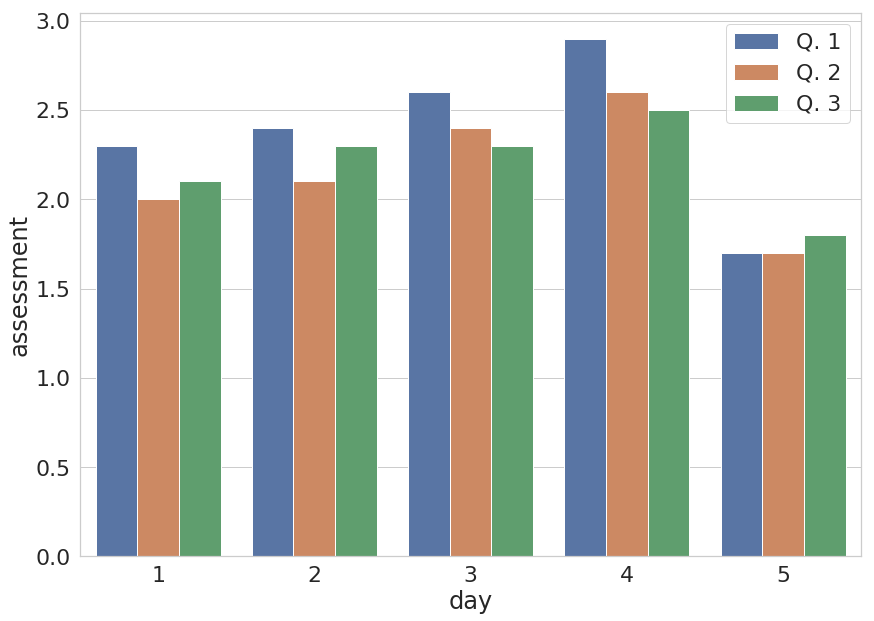

In [18]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="day", y="assessment", hue='question', ci=None, data=day_ass)
ax.set(xlabel='day', ylabel='assessment')
que_index = [-1.27, -1 , -0.73]
i = 0

# for index, row in day_ass.iterrows():
#     ax.text(row.day+que_index[i],row.assessment, row.assessment, color='black', ha="center")
#     i+=1
#     i = i%len(que_index)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_9_day_assessment_without_title.png")

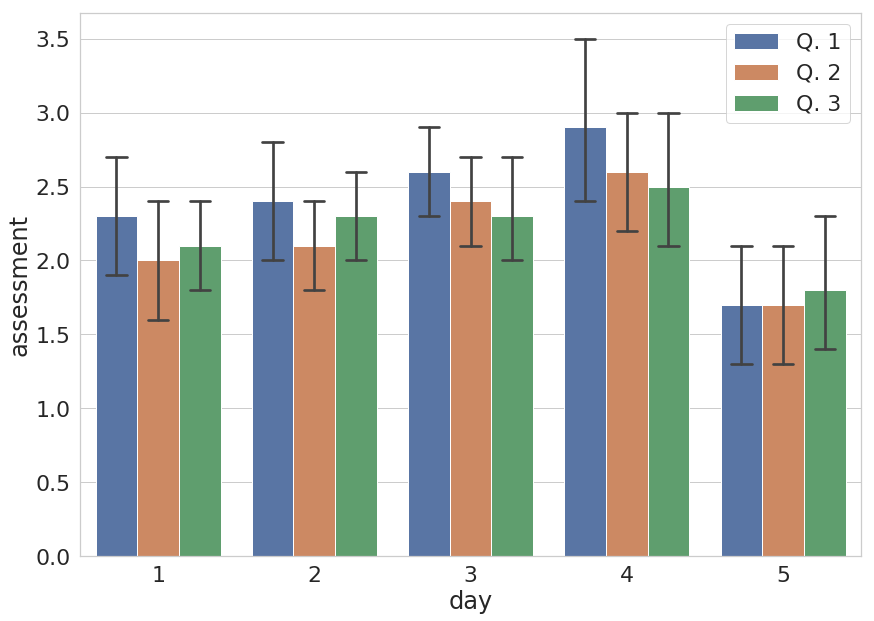

In [58]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="day", y="assessment", hue='question', capsize=.13, data=day_ass)
ax.set(xlabel='day', ylabel='assessment')
que_index = [-1.27, -1 , -0.73]
i = 0

# for index, row in day_ass.iterrows():
#     ax.text(row.day+que_index[i],row.assessment, row.assessment, color='black', ha="center")
#     i+=1
#     i = i%len(que_index)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_9_day_assessment_without_title_stddev.png")

In [59]:
# sns.set_style('whitegrid')
# f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.barplot(x="day", y="assessment", hue='question', data=day_ass)
# ax.set(xlabel='day', ylabel='assessment')
# que_index = [-1.27, -1 , -0.73]
# i = 0

# # for index, row in day_ass.iterrows():
# #     ax.text(row.day+que_index[i],row.assessment, row.assessment, color='black', ha="center")
# #     i+=1
# #     i = i%len(que_index)

# # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.gca().legend().set_title('')
# plt.savefig("../data/figure/fig6_9_day_assessment_without_title.png")

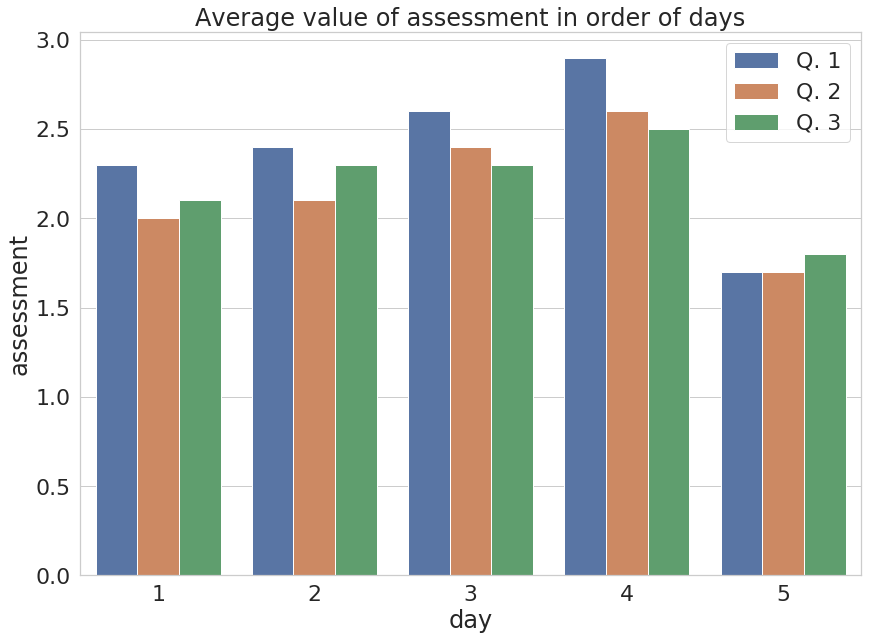

In [72]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="day", y="assessment", hue='question', ci=None, data=day_ass)
ax.set(xlabel='day', ylabel='assessment')
que_index = [-1.27, -1 , -0.73]
i = 0

# for index, row in day_ass.iterrows():
#     ax.text(row.day+que_index[i],row.assessment, row.assessment, color='black', ha="center")
#     i+=1
#     i = i%len(que_index)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Average value of assessment in order of days')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_9_day_assessment_with_title.png")

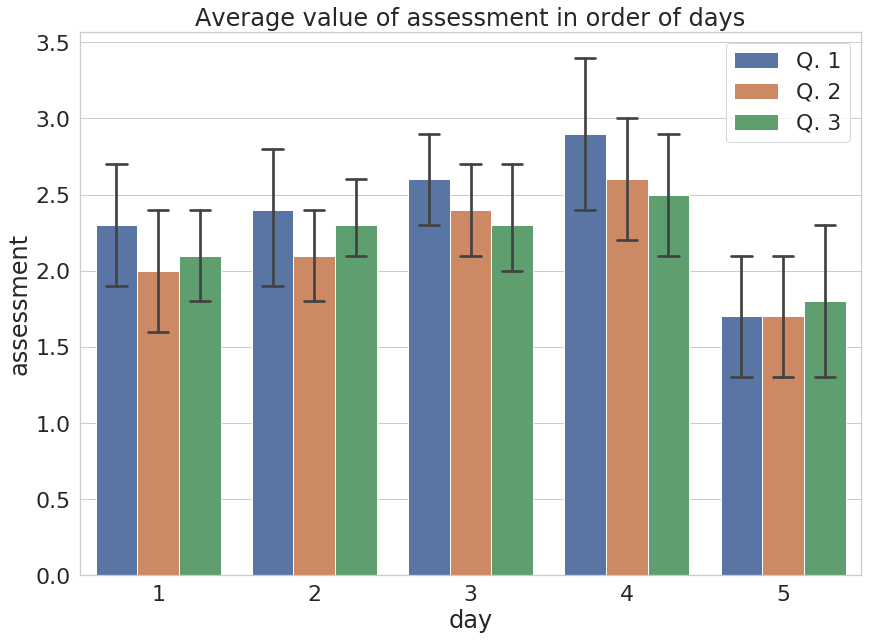

In [71]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="day", y="assessment", hue='question', capsize=.13, data=day_ass)
ax.set(xlabel='day', ylabel='assessment')
que_index = [-1.27, -1 , -0.73]
i = 0

# for index, row in day_ass.iterrows():
#     ax.text(row.day+que_index[i],row.assessment, row.assessment, color='black', ha="center")
#     i+=1
#     i = i%len(que_index)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Average value of assessment in order of days')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_9_day_assessment_with_title_stddev.png")

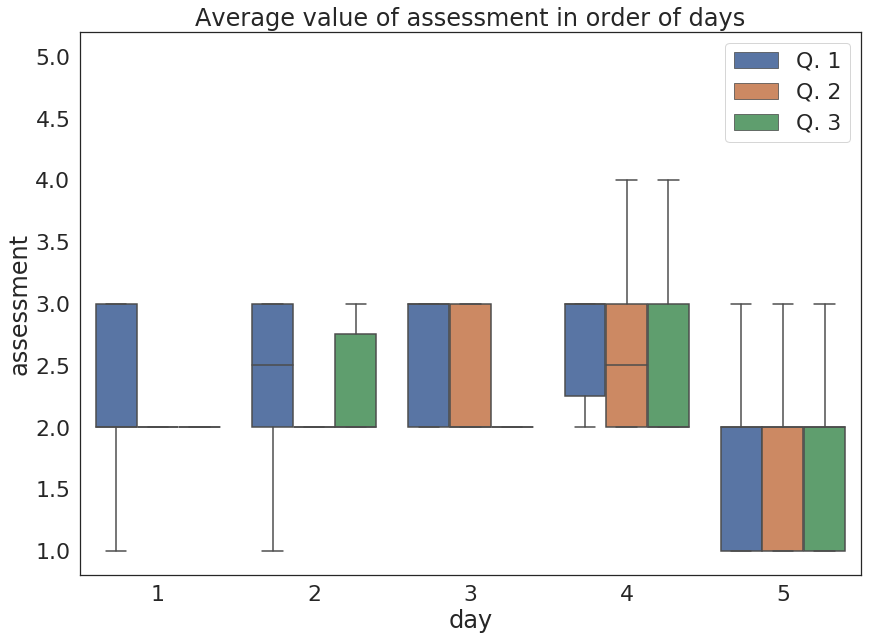

In [182]:
sns.set_style('white')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="day", y="assessment", hue='question', fliersize=0,data=day_ass)
ax.set(xlabel='day', ylabel='assessment')
# que_index = [-1.27, -1 , -0.73]
# i = 0

# for index, row in day_ass.iterrows():
#     ax.text(row.day+que_index[i],row.assessment, row.assessment, color='black', ha="center")
#     i+=1
#     i = i%len(que_index)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Average value of assessment in order of days')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/boxplot_day_assessment_with_title_stddev.png")

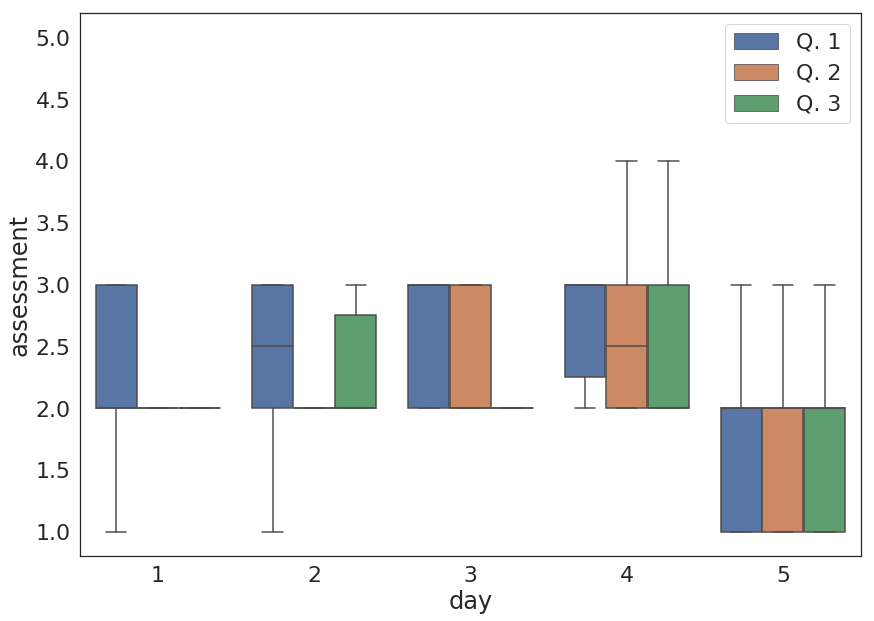

In [183]:
sns.set_style('white')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="day", y="assessment", hue='question', fliersize=0,data=day_ass)
ax.set(xlabel='day', ylabel='assessment')
# que_index = [-1.27, -1 , -0.73]
# i = 0

# for index, row in day_ass.iterrows():
#     ax.text(row.day+que_index[i],row.assessment, row.assessment, color='black', ha="center")
#     i+=1
#     i = i%len(que_index)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/boxplot_day_assessment_without_title_stddev.png")

# Diagram 8: All assessment

## Data processing

In [62]:

# cols = ['day', 'task', 'question', 'assessment', 'x_axis']

# all_average_ass = df[['day', 'task', 'question', 'assessment']].groupby(['day', 'task', 'question']).mean()
# all_average_ass = all_average_ass.reset_index()
# all_average_ass['x_axis'] = all_average_ass['day'].astype(str) + '.' + all_average_ass['task'].astype(str)
# all_average_ass = all_average_ass[cols]
# all_average_ass['question'] = 'Q. ' + all_average_ass['question'].astype(str)

# all_std_ass = df[['day', 'task', 'question', 'assessment']].groupby(['day', 'task', 'question']).std()
# all_std_ass = all_std_ass.reset_index()
# all_std_ass['x_axis'] = all_std_ass['day'].astype(str) + '.' + all_std_ass['task'].astype(str)
# all_std_ass = all_std_ass[cols]
# all_std_ass['question'] = 'Q. ' + all_std_ass['question'].astype(str)

# all_average_ass = all_average_ass.sort_values(by=['day', 'task'])
# index_order = all_average_ass['x_axis'].unique()

In [63]:
cols = ['day', 'task', 'question', 'assessment', 'x_axis']

all_average_ass = df[['day', 'task', 'question', 'assessment']] # .groupby(['day', 'task', 'question']).mean()
# all_average_ass = all_average_ass.reset_index()
all_average_ass['x_axis'] = all_average_ass['day'].astype(str) + '.' + all_average_ass['task'].astype(str)
all_average_ass = all_average_ass[cols]
all_average_ass['question'] = 'Q. ' + all_average_ass['question'].astype(str)

all_std_ass = df[['day', 'task', 'question', 'assessment']].groupby(['day', 'task', 'question']).std()
all_std_ass = all_std_ass.reset_index()
all_std_ass['x_axis'] = all_std_ass['day'].astype(str) + '.' + all_std_ass['task'].astype(str)
all_std_ass = all_std_ass[cols]
all_std_ass['question'] = 'Q. ' + all_std_ass['question'].astype(str)

all_average_ass = all_average_ass.sort_values(by=['day', 'task'])
index_order = all_average_ass['x_axis'].unique()

## Draw diagram

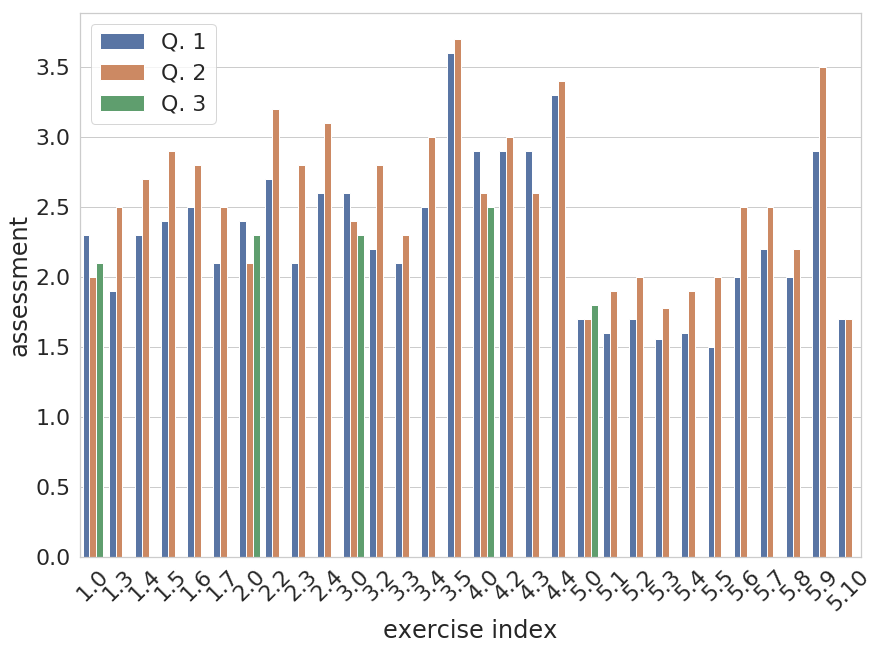

In [64]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', ci=None, data=all_average_ass, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_10_all_avg_assessment_without_title.png", bbox_inches='tight')

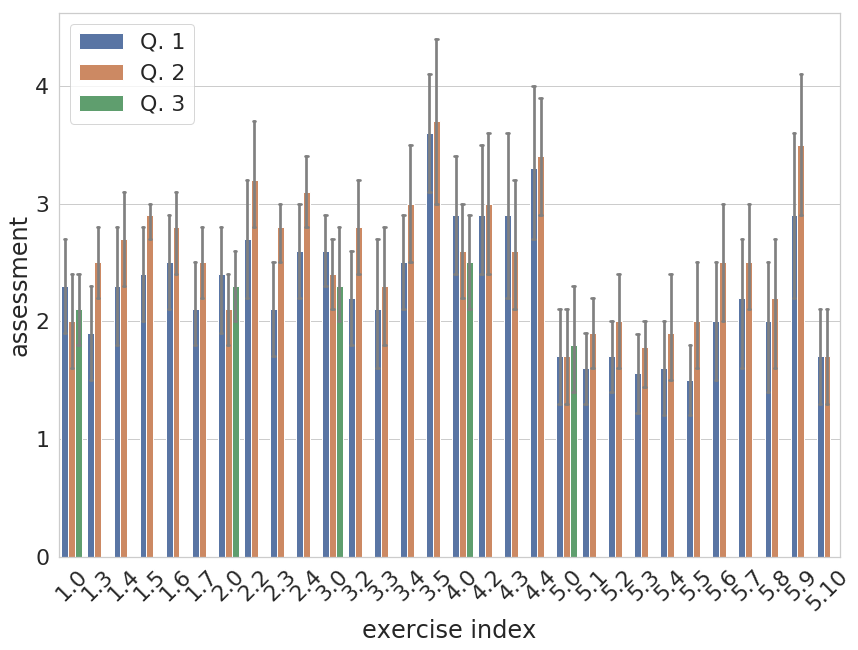

In [65]:
##### sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', capsize=.1, errcolor=".5", data=all_average_ass, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_10_all_avg_assessment_without_title_stddev.png", bbox_inches='tight')

In [66]:
# sns.set_style('whitegrid')
# f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.barplot(x="x_axis", y="assessment", hue='question', data=all_average_ass, order=index_order)
# ax.set(xlabel='exercise index', ylabel='assessment')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.gca().legend().set_title('')
# plt.savefig("../data/figure/fig6_10_all_avg_assessment_without_title.png", bbox_inches='tight')

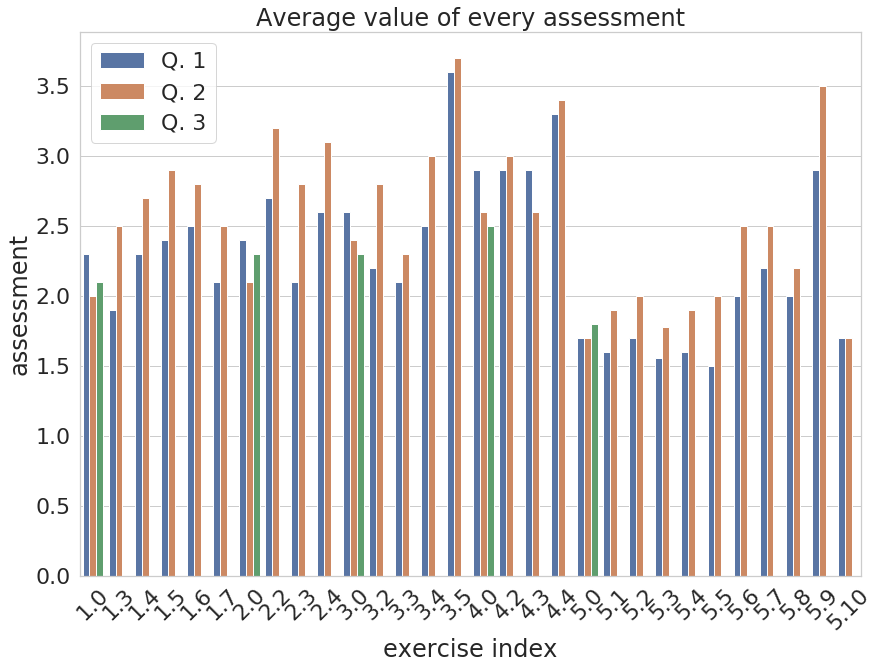

In [67]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', ci=None, data=all_average_ass, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Average value of every assessment')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_10_all_avg_assessment_with_title.png", bbox_inches='tight')

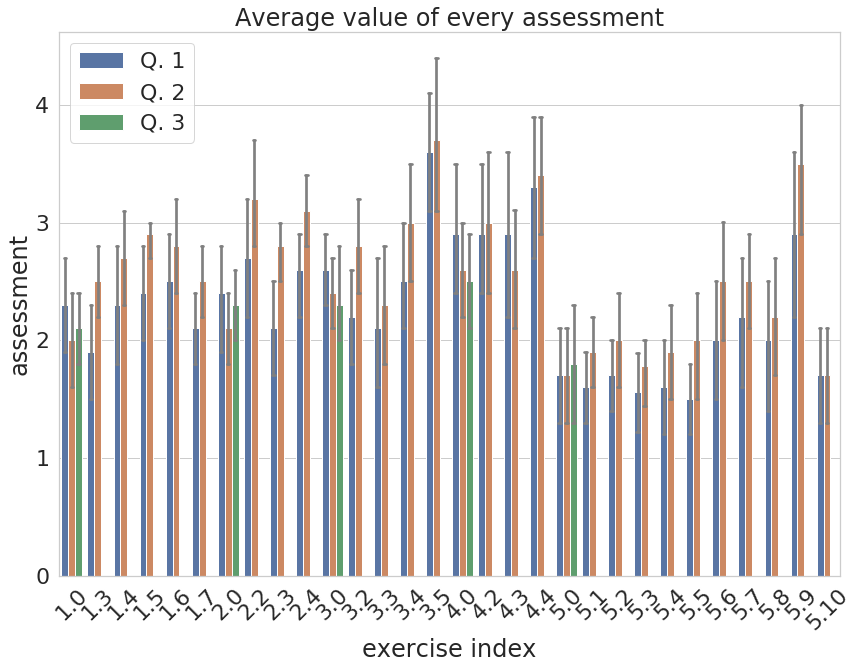

In [68]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', capsize=.1, errcolor=".5", data=all_average_ass, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Average value of every assessment')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_10_all_avg_assessment_with_title_stddev.png", bbox_inches='tight')

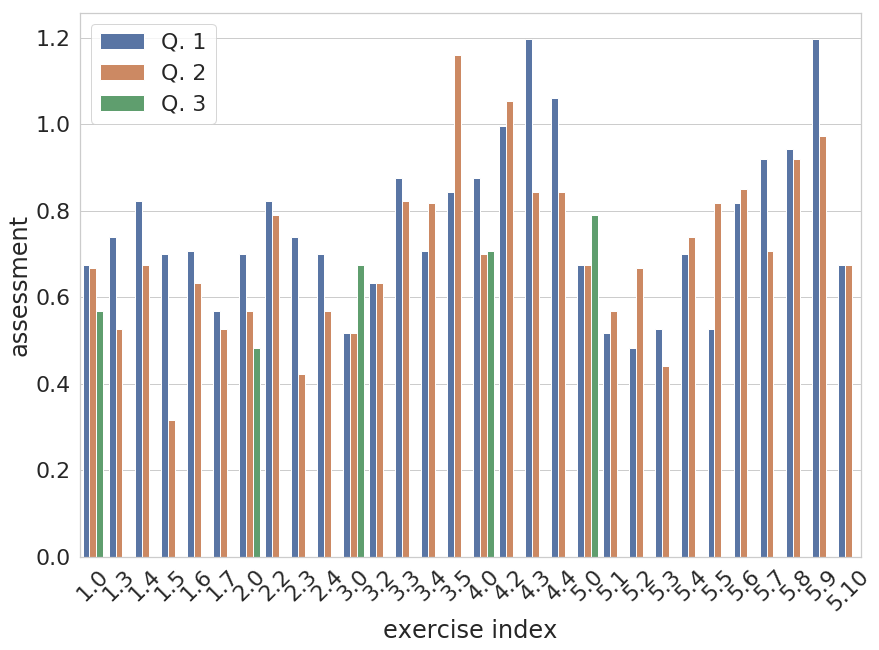

In [69]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', data=all_std_ass, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_10_all_cov_assessment_without_title.png", bbox_inches='tight')

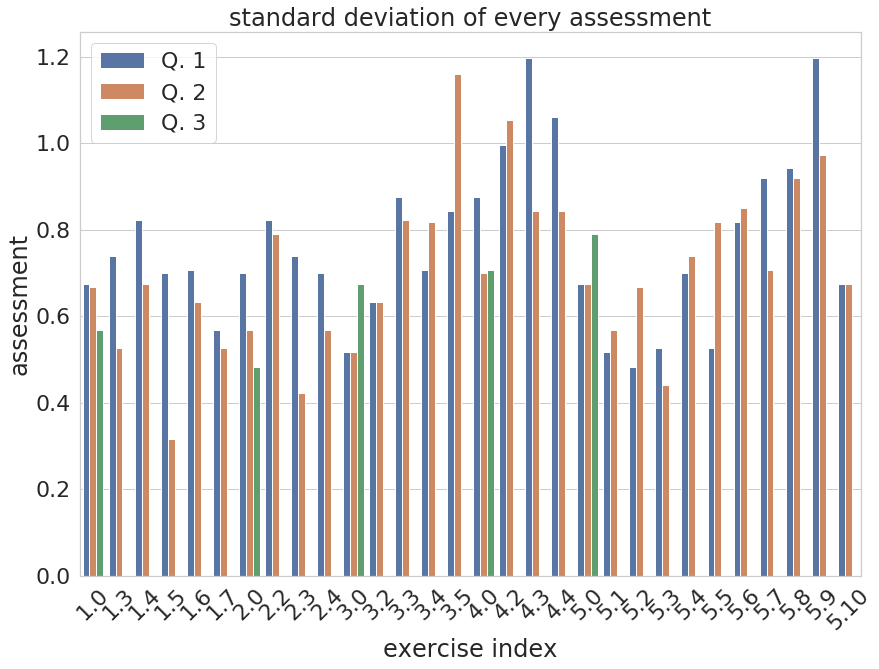

In [70]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', data=all_std_ass, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('standard deviation of every assessment')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_10_all_cov_assessment_with_title.png", bbox_inches='tight')

## Table 9: ANOVA for all
### Reset index for table

In [72]:
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"], [36, "1.1|1.4"]]
df_tmp1 = pd.DataFrame()
df_tmp2 = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = table_last[(table_last['exc']==num)]
    df_curr['exc'] = string
    df_tmp1 = pd.concat([df_tmp1, df_curr])
    
    df_curr = table_last_repetition[(table_last_repetition['exc']==num)]
    df_curr['exc'] = string
    df_tmp2 = pd.concat([df_tmp2, df_curr])
    
# df_tmp.reset_index(drop=True)
df_tmp1['exc'] = df_tmp1['exc'].astype('str')+'(first/last)'
df_tmp2['exc'] = df_tmp2['exc'].astype('str')+'(first/last repetition)'
df_tmp = pd.concat([df_tmp1, df_tmp2])
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,exc,type,ANOVA,U-test
4,1.5|5.1(first/last),score,0.000309,0.028280
6,1.5|5.1(first/last),time,0.163910,0.754023
5,2.1|5.2(first/last),score,0.009767,0.075800
7,2.1|5.2(first/last),time,0.062647,0.250592
6,2.2|5.3(first/last),score,0.036152,0.250592
8,2.2|5.3(first/last),time,0.000443,0.009023
7,2.3|5.4(first/last),score,0.044224,0.028280
9,2.3|5.4(first/last),time,0.001144,0.009023
9,3.2|5.5(first/last),score,0.001613,0.009023
12,3.2|5.5(first/last),time,0.028257,0.009023


## Table 10: ANOVA for selected exercises
### reset index

In [233]:
df_tmp = pd.DataFrame(np.array([]).reshape(0, 7), columns= ['exc', 'type', 'base_sd', 'test_sd', 
                                                           'base_avg', 'test_avg', 'ANOVA'])
for base, test in selected_exc_pair:
    if (base, test) == (3, 5):
        exc = '1.2|1.4'
    if (base, test) == (9, 18):
        exc = '2.2|4.3'
    if (base, test) == (10, 17):
        exc = '2.3|4.2'
        
    # score
    _, p_value = f_oneway(selected_exc_data_score[base], selected_exc_data_score[test])
    sd_base = np.std(selected_exc_data_score[base])
    sd_test = np.std(selected_exc_data_score[test])
    avg_base = np.mean(selected_exc_data_score[base])
    avg_test = np.mean(selected_exc_data_score[test])
    
    curr = pd.DataFrame(np.array(
        [exc, 'score', sd_base, sd_test, avg_base, avg_test, p_value]).reshape(1, 7), 
                        columns= ['exc', 'type', 'base_sd', 'test_sd', 'base_avg', 'test_avg', 'ANOVA'])
    df_tmp = pd.concat([df_tmp, curr])
    
    # time
    _, p_value = f_oneway(selected_exc_data_time[base], selected_exc_data_time[test])
    sd_base = np.std(selected_exc_data_time[base])
    sd_test = np.std(selected_exc_data_time[test])
    avg_base = np.mean(selected_exc_data_time[base])
    avg_test = np.mean(selected_exc_data_time[test])
    
    curr = pd.DataFrame(np.array(
        [exc, 'time', sd_base, sd_test, avg_base, avg_test, p_value]).reshape(1, 7), 
                        columns= ['exc', 'type', 'base_sd', 'test_sd', 'base_avg', 'test_avg', 'ANOVA'])
    df_tmp = pd.concat([df_tmp, curr])
    
                                                           
for base, test in selected_exc_pair_last_day:
    
    if (base, test) == (9, 18):
        exc = '5.3|5.9'
    if (base, test) == (10, 17):
        exc = '5.4|5.8'
        
    # score
    _, p_value = f_oneway(selected_exc_data_last_day_score[base], selected_exc_data_last_day_score[test])
    sd_base = np.std(selected_exc_data_last_day_score[base])
    sd_test = np.std(selected_exc_data_last_day_score[test])
    avg_base = np.mean(selected_exc_data_last_day_score[base])
    avg_test = np.mean(selected_exc_data_last_day_score[test])
    
    curr = pd.DataFrame(np.array(
        [exc, 'score', sd_base, sd_test, avg_base, avg_test, p_value]).reshape(1, 7), 
                        columns= ['exc', 'type', 'base_sd', 'test_sd', 'base_avg', 'test_avg', 'ANOVA'])
    df_tmp = pd.concat([df_tmp, curr])
    
    # time
    _, p_value = f_oneway(selected_exc_data_last_day_time[base], selected_exc_data_last_day_time[test])
    sd_base = np.std(selected_exc_data_last_day_time[base])
    sd_test = np.std(selected_exc_data_last_day_time[test])
    avg_base = np.mean(selected_exc_data_last_day_time[base])
    avg_test = np.mean(selected_exc_data_last_day_time[test])
    
    curr = pd.DataFrame(np.array(
        [exc, 'time', sd_base, sd_test, avg_base, avg_test, p_value]).reshape(1, 7), 
                        columns= ['exc', 'type', 'base_sd', 'test_sd', 'base_avg', 'test_avg', 'ANOVA'])
    df_tmp = pd.concat([df_tmp, curr])
    
exc_pair = [[1.2, 1.4], [2.2, 4.3], [5.3, 5.5], [2.3, 4.2], [5.4, 5.8]]

for base, test in exc_pair:
    exc = str(base)+'|'+str(test)
    # assessment
    _, p_value = f_oneway(selected_exc_data_all_assess1[base], selected_exc_data_all_assess1[test])
    sd_base = np.std(selected_exc_data_all_assess1[base])
    sd_test = np.std(selected_exc_data_all_assess1[test])
    avg_base = np.mean(selected_exc_data_all_assess1[base])
    avg_test = np.mean(selected_exc_data_all_assess1[test])
    
    curr = pd.DataFrame(np.array(
        [exc, 'assessment|Q1', sd_base, sd_test, avg_base, avg_test, p_value]).reshape(1, 7), 
                        columns= ['exc', 'type', 'base_sd', 'test_sd', 'base_avg', 'test_avg', 'ANOVA'])
    df_tmp = pd.concat([df_tmp, curr])
    
    # assessment
    _, p_value = f_oneway(selected_exc_data_all_assess2[base], selected_exc_data_all_assess2[test])
    sd_base = np.std(selected_exc_data_all_assess2[base])
    sd_test = np.std(selected_exc_data_all_assess2[test])
    avg_base = np.mean(selected_exc_data_all_assess2[base])
    avg_test = np.mean(selected_exc_data_all_assess2[test])
    
    curr = pd.DataFrame(np.array(
        [exc, 'assessment|Q2', sd_base, sd_test, avg_base, avg_test, p_value]).reshape(1, 7), 
                        columns= ['exc', 'type', 'base_sd', 'test_sd', 'base_avg', 'test_avg', 'ANOVA'])
    df_tmp = pd.concat([df_tmp, curr])
    

    
df_tmp

,exc,type,base_sd,test_sd,base_avg,test_avg,ANOVA
0,1.2|1.4,score,16.0727795687,117.005341148,55.9595022502,131.882145422,0.254423930816
0,1.2|1.4,time,7.49073501808,14.7187461339,69.1666666667,75.4871428571,0.287786171393
0,2.2|4.3,score,62.4592091978,194.157975586,162.799959936,259.681550104,0.197845976642
0,2.2|4.3,time,23.5754632857,128.380956272,96.5555555556,198.681111111,0.039997681361
0,2.3|4.2,score,320.732533097,117.20470575,407.664572934,388.506111832,0.869546719703
0,2.3|4.2,time,41.938520553,46.6594386294,112.222222222,116.056428571,0.861261226571
0,5.3|5.9,score,28.8822369689,121.059858317,115.839377803,201.964650983,0.0524947898936
0,5.3|5.9,time,18.0183933801,121.881404105,80.9166666667,164.966666667,0.0555894872444
0,5.4|5.8,score,97.4370061376,120.735701622,232.805955573,352.486588032,0.0326757254171
0,5.4|5.8,time,20.9461213593,29.4830459756,80.4333333333,99.8333333333,0.124961557435


## ANOVA for selected exercises (first and last attempt)

In [254]:
df_tmp = pd.DataFrame(np.array([]).reshape(0, 7), columns= ['exc', 'type', 'base_sd', 'test_sd', 
                                                           'base_avg', 'test_avg', 'ANOVA'])
# exc num mapping
selected_exc_pair_mapping = [[3,5,1, '1.2|1.4'], [9,18,1,'2.2|4.3'], [10, 17, 1, '2.3|4.2'], [9, 18, 2, '5.3|5.5'],
                            [10, 17,2, '5.4|5.8']]
tmp = selected_exc_data
for base, test, day_level, exc in selected_exc_pair_mapping:
    if day_level == 1:
        exc+='(first)'
        a = tmp[(tmp['type']=='score') & (tmp['exc']==base)]['first']
        b = tmp[(tmp['type']=='score') & (tmp['exc']==test)]['first']
        c = tmp[(tmp['type']=='time') & (tmp['exc']==base)]['first']
        d = tmp[(tmp['type']=='time') & (tmp['exc']==test)]['first']
        
    if day_level == 2:
        exc+='(last)'
        a = tmp[(tmp['type']=='score') & (tmp['exc']==base)]['last']
        b = tmp[(tmp['type']=='score') & (tmp['exc']==test)]['last']
        c = tmp[(tmp['type']=='time') & (tmp['exc']==base)]['last']
        d = tmp[(tmp['type']=='time') & (tmp['exc']==test)]['last']
        
    _, p_value = f_oneway(a, b)
    sd_base = np.std(a)
    sd_test = np.std(b)
    avg_base = np.mean(a)
    avg_test = np.mean(b)
    
    curr = pd.DataFrame(np.array(
        [exc, 'score', sd_base, sd_test, avg_base, avg_test, p_value]).reshape(1, 7), 
                        columns= ['exc', 'type', 'base_sd', 'test_sd', 'base_avg', 'test_avg', 'ANOVA'])
    df_tmp = df_tmp.append(curr)
    
    _, p_value = f_oneway(c, d)
    sd_base = np.std(c)
    sd_test = np.std(d)
    avg_base = np.mean(c)
    avg_test = np.mean(d)
    
    curr = pd.DataFrame(np.array(
        [exc, 'time', sd_base, sd_test, avg_base, avg_test, p_value]).reshape(1, 7), 
                        columns= ['exc', 'type', 'base_sd', 'test_sd', 'base_avg', 'test_avg', 'ANOVA'])
    df_tmp = df_tmp.append(curr)
    
df_tmp

,exc,type,base_sd,test_sd,base_avg,test_avg,ANOVA
0,1.2|1.4(first),score,11.7658213209,63.67528981,17.5801009106,97.0113378363,0.00171317952381
0,1.2|1.4(first),time,19.5540277181,25.0958163844,73.2,83.0,0.367653349438
0,2.2|4.3(first),score,30.6510377057,352.736452101,145.90288148,318.533459757,0.16079167754
0,2.2|4.3(first),time,23.0844103239,171.422548108,118.9,237.1,0.0552135258718
0,2.3|4.2(first),score,114.332856621,121.041384854,291.503817225,402.524860121,0.060780382341
0,2.3|4.2(first),time,32.3061913571,47.3814309619,127.1,141.0,0.476485307388
0,5.3|5.5(last),score,32.5531502385,142.160800876,112.157779167,204.421064173,0.0738664528571
0,5.3|5.5(last),time,16.4328938413,125.793481548,78.4,162.0,0.0635716937652
0,5.4|5.8(last),score,53.2721522276,119.636331089,200.551280484,360.384929398,0.00178572150291
0,5.4|5.8(last),time,20.5757138394,30.2555779981,77.8,100.0,0.0853960391606


## Table 11: KS-Test

In [28]:
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]
df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = ks_table[ks_table['exc'].astype(float)==num]
    df_curr['exc'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,exc,type,ks(first),ks(last),ks(last_repetition)
0,1.5|5.1,score,0.69378746641,0.849226206751,0.138555076587
0,1.5|5.1,time,0.614247051847,0.263977730194,0.263977730194
0,2.1|5.2,score,0.65312174489,0.745247103948,0.995274595375
0,2.1|5.2,time,0.999677274092,0.94300202686,0.387863235849
0,2.2|5.3,score,0.959481955701,0.952174271609,0.999622526132
0,2.2|5.3,time,0.826658119652,0.985674581421,0.723361486735
0,2.3|5.4,score,0.805854965315,0.571342368978,0.254342550184
0,2.3|5.4,time,0.554673261411,0.849864213231,0.917449300924
0,3.2|5.5,score,0.921462874437,0.485289745273,0.523629867385
0,3.2|5.5,time,0.962112723867,0.99963059531,0.946205925256


In [29]:
df_tmp.to_csv('../data/ks_table.csv', index=False)